To dataset to phrame apo: https://cs.nyu.edu/~roweis/data.html

Exei 60k training sample kai 10k test samples

In [1]:
import scipy.io
import time 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mat_data = scipy.io.loadmat("C:\\Users\\dimos\\PyProjecks\\Project_SVMs\\mnist_all.mat")

In [2]:
def load_data(mat_data, key_prefix):
    data = []
    labels = []
    for i in range(10):
        data.append(mat_data[f'{key_prefix}{i}'])
        labels.append(np.full(mat_data[f'{key_prefix}{i}'].shape[0], i))
    return np.vstack(data), np.hstack(labels)

In [3]:
# 28x28 pixel einai oi eikones

train_data, train_labels = load_data(mat_data, 'train')
test_data, test_labels = load_data(mat_data, 'test')


In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Mini dataset to apply the svm

In [5]:
def load_data_mini(mat_data, key_prefix, L):
    data = []
    labels = []
    for i in range(10):
        digit_data = mat_data[f'{key_prefix}{i}']
        num_samples = min(L, digit_data.shape[0])
        sampled_data = digit_data[:num_samples]
        sampled_labels = np.full(num_samples, i)
        data.append(sampled_data)
        labels.append(sampled_labels)
    return np.vstack(data), np.hstack(labels)

In [6]:
X_mini, y_mini = load_data_mini(mat_data, 'train', 500)
print(X_mini.shape)
print(y_mini.shape)

(5000, 784)
(5000,)


(5000, 28, 28)


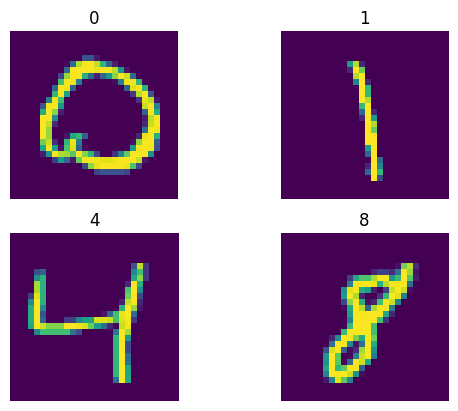

In [7]:
# show some images 
X = X_mini.reshape(X_mini.shape[0],28,-1)
print(X.shape)

plt.subplot(221)
plt.imshow(X[100])
plt.axis('off')
plt.title(y_mini[100])
plt.subplot(222)
plt.imshow(X[700])
plt.axis('off')
plt.title(y_mini[700])
plt.subplot(223)
plt.imshow(X[2000])
plt.axis('off')
plt.title(y_mini[2000])
plt.subplot(224)
plt.imshow(X[4000])
plt.axis('off')
plt.title(y_mini[4000])

plt.show()

Normalizing the dataset in vector form 

In [8]:
print(X_mini.shape)
print(y_mini.shape)

def normal(X_mini):
    #dedomeno oti einai gray scale eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

X_mini_n = normal(X_mini)


(5000, 784)
(5000,)


In [9]:
max_value = np.max(X_mini_n)
mean_value = np.mean(X_mini_n)
print(max_value)
print(mean_value)

1.0
-0.7373607402961179


### Linear SVM

In [10]:
test_data_n = normal(test_data)

In [11]:
from sklearn.svm import SVC

def svm_linear(c):
    svc = SVC(kernel= 'linear', C = c)
    svc.fit(X_mini_n, y_mini)

    #pred values and accuracy on training
    y_pred_train = svc.predict(X_mini_n)
    acc_train = np.mean(y_pred_train == y_mini)
    acc_train_linear.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc.predict(test_data_n)
    acc_test = np.mean(y_pred_test == test_labels)
    acc_test_linear.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'This accuracy scores are for C: {c}')

Train accuracy: 0.865400
Test accuracy: 0.860200
This accuracy scores are for C: 0.0001
Train accuracy: 0.932200
Test accuracy: 0.911400
This accuracy scores are for C: 0.001
Train accuracy: 0.967200
Test accuracy: 0.925200
This accuracy scores are for C: 0.01
Train accuracy: 0.997800
Test accuracy: 0.915900
This accuracy scores are for C: 0.1
Train accuracy: 1.000000
Test accuracy: 0.912200
This accuracy scores are for C: 1
Train accuracy: 1.000000
Test accuracy: 0.912200
This accuracy scores are for C: 10
Train accuracy: 1.000000
Test accuracy: 0.912200
This accuracy scores are for C: 100
duration was: 33.47


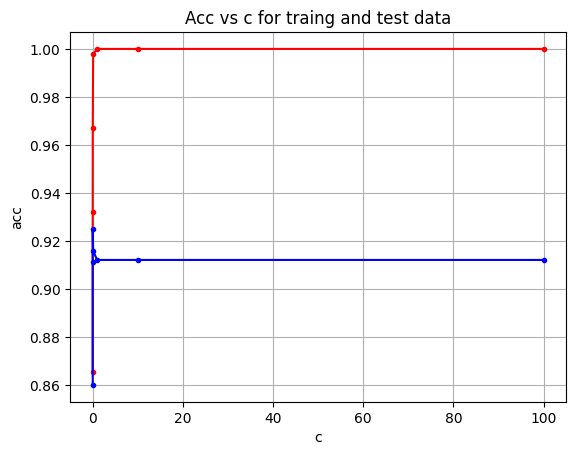

In [56]:
c_linear = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_linear = []
acc_test_linear = []

s_time = time.time()
for c in c_linear:
    svm_linear(c)
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_linear, acc_train_linear, '.-', color='red')
plt.plot(c_linear, acc_test_linear, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

Train accuracy: 0.865400
Test accuracy: 0.860200
This accuracy scores are for C: 0.0001
Train accuracy: 0.932200
Test accuracy: 0.911400
This accuracy scores are for C: 0.001
Train accuracy: 0.967200
Test accuracy: 0.925200
This accuracy scores are for C: 0.01
Train accuracy: 0.997800
Test accuracy: 0.915900
This accuracy scores are for C: 0.1
Train accuracy: 1.000000
Test accuracy: 0.912200
This accuracy scores are for C: 1
duration was: 31.58


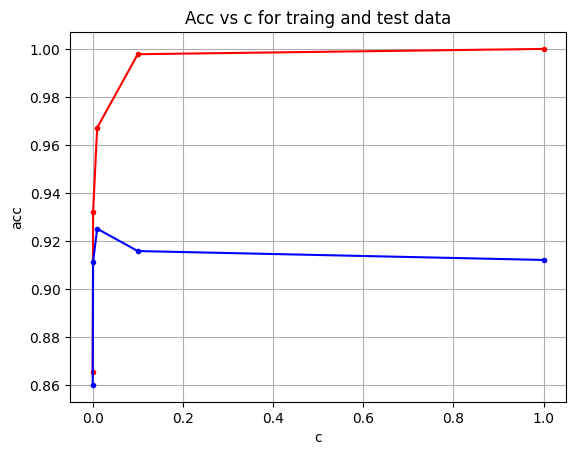

In [57]:
c_linear = [0.0001, 0.001, 0.01, 0.1, 1]
acc_train_linear = []
acc_test_linear = []

s_time = time.time()
for c in c_linear:
    svm_linear(c)
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_linear, acc_train_linear, '.-', color='red')
plt.plot(c_linear, acc_test_linear, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

### SVM poly 

In [12]:
from sklearn.svm import SVC

def svc_poly(c):
    svc_poly = SVC(kernel= 'poly', C = c)
    svc_poly.fit(X_mini_n, y_mini)

    #pred values and accuracy on training
    y_pred_train = svc_poly.predict(X_mini_n)
    acc_train = np.mean(y_pred_train == y_mini)
    acc_train_poly.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc_poly.predict(test_data_n)
    acc_test = np.mean(y_pred_test == test_labels)
    acc_test_poly.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'This accuracy scores are for C: {c}')

Train accuracy: 0.790600
Test accuracy: 0.794900
This accuracy scores are for C: 0.0001
Train accuracy: 0.828600
Test accuracy: 0.824200
This accuracy scores are for C: 0.001
Train accuracy: 0.931000
Test accuracy: 0.912700
This accuracy scores are for C: 0.01
Train accuracy: 0.980600
Test accuracy: 0.945200
This accuracy scores are for C: 0.1
Train accuracy: 0.999800
Test accuracy: 0.949300
This accuracy scores are for C: 1
Train accuracy: 1.000000
Test accuracy: 0.949400
This accuracy scores are for C: 10
Train accuracy: 1.000000
Test accuracy: 0.949400
This accuracy scores are for C: 100
duration was: 64.51


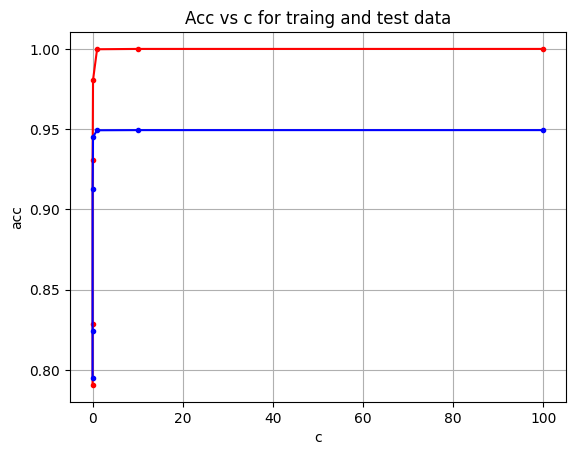

In [59]:
c_poly = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_poly = []
acc_test_poly = []

s_time = time.time()
for c in c_poly:
    svc_poly(c)
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_poly, acc_train_poly, '.-', color='red')
plt.plot(c_poly, acc_test_poly, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

Train accuracy: 0.790600
Test accuracy: 0.794900
This accuracy scores are for C: 0.0001
Train accuracy: 0.791600
Test accuracy: 0.797200
This accuracy scores are for C: 0.0005
Train accuracy: 0.828600
Test accuracy: 0.824200
This accuracy scores are for C: 0.001
Train accuracy: 0.912800
Test accuracy: 0.900600
This accuracy scores are for C: 0.005
Train accuracy: 0.931000
Test accuracy: 0.912700
This accuracy scores are for C: 0.01
Train accuracy: 0.966200
Test accuracy: 0.939200
This accuracy scores are for C: 0.05
Train accuracy: 0.980600
Test accuracy: 0.945200
This accuracy scores are for C: 0.1
Train accuracy: 0.998800
Test accuracy: 0.950400
This accuracy scores are for C: 0.5
Train accuracy: 0.999800
Test accuracy: 0.949300
This accuracy scores are for C: 1
duration was: 88.25


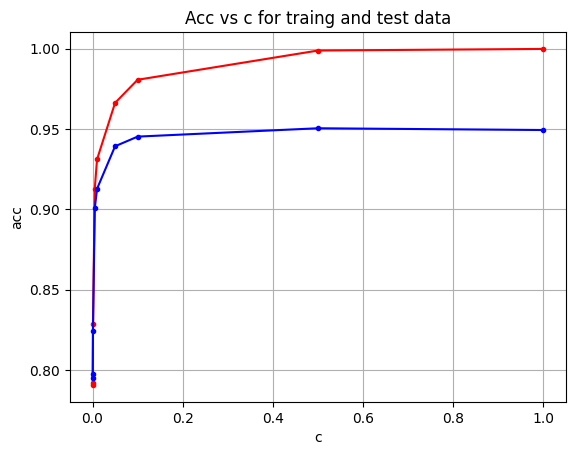

In [36]:
#gia na doyme poies time einia kales eos 1
acc_train_poly = []
acc_test_poly = []

c_poly_optimize = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
s_time = time.time()
for c in c_poly_optimize:
    svc_poly(c)
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_poly_optimize, acc_train_poly, '.-', color='red')
plt.plot(c_poly_optimize, acc_test_poly, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

### SVC rbf

In [13]:
from sklearn.svm import SVC

def svc_rbf(c, g):
    svc_rbf = SVC(kernel='rbf', C=c, gamma=g)
    svc_rbf.fit(X_mini_n, y_mini)

    #pred values and accuracy on train
    y_pred_train = svc_rbf.predict(X_mini_n)
    acc_train = np.mean(y_pred_train == y_mini)
    acc_train_rbf.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc_rbf.predict(test_data_n)
    acc_test = np.mean(y_pred_test == test_labels)
    acc_test_rbf.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'The C is: {c} and the gamma is: {g}')

    return acc_train, acc_test

Train accuracy: 0.766600
Test accuracy: 0.770900
The C is: 0.0001 and the gamma is: auto
Train accuracy: 0.766600
Test accuracy: 0.770900
The C is: 0.001 and the gamma is: auto
Train accuracy: 0.768200
Test accuracy: 0.771800
The C is: 0.01 and the gamma is: auto
Train accuracy: 0.904000
Test accuracy: 0.894700
The C is: 0.1 and the gamma is: auto
Train accuracy: 0.958400
Test accuracy: 0.934400
The C is: 1 and the gamma is: auto
Train accuracy: 0.997800
Test accuracy: 0.946600
The C is: 10 and the gamma is: auto
Train accuracy: 1.000000
Test accuracy: 0.945800
The C is: 100 and the gamma is: auto
Durration: 151.09


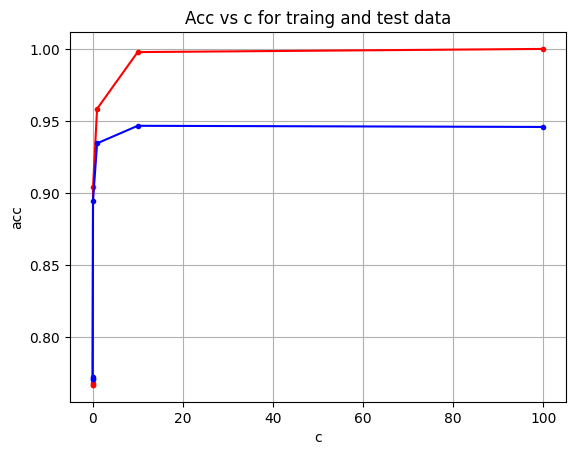

In [63]:
c_rbf= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_rbf = []
acc_test_rbf = []

s_time = time.time()
for c in c_rbf:
    svc_rbf(c, 'auto')
f_time = time.time()
dur = f_time - s_time
print(f'Durration: {dur:.2f}')

plt.plot(c_rbf, acc_train_rbf, '.-', color='red')
plt.plot(c_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

Train accuracy: 0.766600
Test accuracy: 0.770900
The C is: 0.0001 and the gamma is: auto
Train accuracy: 0.766600
Test accuracy: 0.770900
The C is: 0.001 and the gamma is: auto
Train accuracy: 0.768200
Test accuracy: 0.771800
The C is: 0.01 and the gamma is: auto
Train accuracy: 0.872600
Test accuracy: 0.864700
The C is: 0.05 and the gamma is: auto
Train accuracy: 0.904000
Test accuracy: 0.894700
The C is: 0.1 and the gamma is: auto
Train accuracy: 0.945400
Test accuracy: 0.923800
The C is: 0.5 and the gamma is: auto
Train accuracy: 0.958400
Test accuracy: 0.934400
The C is: 1 and the gamma is: auto
Train accuracy: 0.991000
Test accuracy: 0.945500
The C is: 5 and the gamma is: auto
Train accuracy: 0.997800
Test accuracy: 0.946600
The C is: 10 and the gamma is: auto
Train accuracy: 0.999200
Test accuracy: 0.946800
The C is: 20 and the gamma is: auto
Durration: 214.49


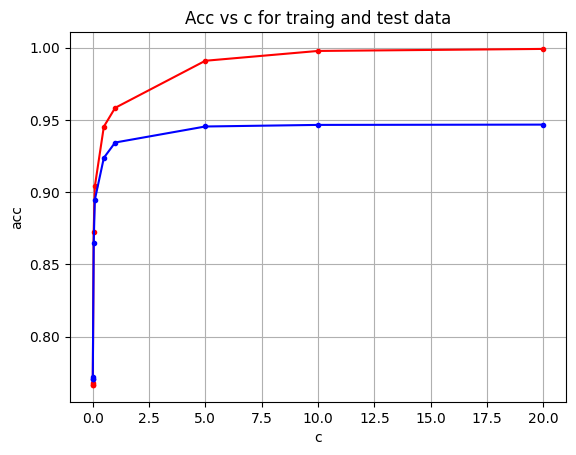

In [28]:
c_rbf= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20]
acc_train_rbf = []
acc_test_rbf = []

s_time = time.time()
for c in c_rbf:
    svc_rbf(c, 'auto')
f_time = time.time()
dur = f_time - s_time
print(f'Durration: {dur:.2f}')

plt.plot(c_rbf, acc_train_rbf, '.-', color='red')
plt.plot(c_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

def hyperpam_tuning(x_train, y_train, c, g):
    x_ts, x_val, y_ts, y_val = train_test_split(
        x_train, y_train, test_size=0.2, stratify=y_train, random_state=0
    )

    svc = SVC(kernel='rbf', C=c, gamma=g)
    svc.fit(x_ts, y_ts)

    #data from training
    y_pred_train = svc.predict(x_ts)
    acc_train = np.mean(y_pred_train == y_ts)
    acc_train_rbf.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #data from validation
    y_pred_val = svc.predict(x_val)
    acc_val = np.mean(y_pred_val == y_val)
    acc_val_rbf.append(acc_val)
    print('Validation accuracy: {0:f}'.format(acc_val))
    print(f'The C is: {c} and the gamma is: {g}')

    return acc_train, acc_val

In [12]:
c_rbf = [0.5, 1, 5, 10]
gamma = [0.001, 0.01, 0.1]
acc_train_rbf = []
acc_val_rbf = []
results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_mini_n, y_mini, c, g)
        f_time = time.time()
        d= f_time - s_time
        print(f'Durration for C:{c} and gamma: {g} is {d} sec')

        results.append({'C':c, 'gamma':g, 'acc_train':acc_train, 'acc_val': acc_val})

f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {round(dur/60,2)} min')
df =pd.DataFrame(results)
df

Train accuracy: 0.936250
Validation accuracy: 0.917000
The C is: 0.5 and the gamma is: 0.001
Durration for C:0.5 and gamma: 0.001 is 3.7834110260009766 sec
Train accuracy: 0.991500
Validation accuracy: 0.946000
The C is: 0.5 and the gamma is: 0.01
Durration for C:0.5 and gamma: 0.01 is 4.946882486343384 sec
Train accuracy: 0.992750
Validation accuracy: 0.153000
The C is: 0.5 and the gamma is: 0.1
Durration for C:0.5 and gamma: 0.1 is 10.254109859466553 sec
Train accuracy: 0.949750
Validation accuracy: 0.932000
The C is: 1 and the gamma is: 0.001
Durration for C:1 and gamma: 0.001 is 3.2063939571380615 sec
Train accuracy: 0.998500
Validation accuracy: 0.952000
The C is: 1 and the gamma is: 0.01
Durration for C:1 and gamma: 0.01 is 5.090221166610718 sec
Train accuracy: 1.000000
Validation accuracy: 0.364000
The C is: 1 and the gamma is: 0.1
Durration for C:1 and gamma: 0.1 is 10.122467994689941 sec
Train accuracy: 0.984250
Validation accuracy: 0.945000
The C is: 5 and the gamma is: 0.001

,C,gamma,acc_train,acc_val
0,0.5,0.001,0.93625,0.917
1,0.5,0.010,0.99150,0.946
2,0.5,0.100,0.99275,0.153
3,1.0,0.001,0.94975,0.932
4,1.0,0.010,0.99850,0.952
5,1.0,0.100,1.00000,0.364
6,5.0,0.001,0.98425,0.945
7,5.0,0.010,1.00000,0.954
8,5.0,0.100,1.00000,0.394
9,10.0,0.001,0.99475,0.945


In [ ]:
idmax = df['acc_val'].idxmax()
idmax

7

In [ ]:
from sklearn.svm import SVC

best_model = SVC(kernel='rbf',C=5, gamma=0.01)
s_time = time.time()
best_model.fit(X_mini_n, y_mini)
f_time = time.time()
print(f'Fitting time is: {f_time - s_time}')
s_t = time.time()
y_pred_train = best_model.predict(X_mini_n)
acc_train = np.mean(y_pred_train == y_mini)
f_t = time.time()
print('Train accuracy: {0:f}'.format(acc_train))
print(f'Training time: {f_t - s_t}')
s_t = time.time()
y_pred_test = best_model.predict(test_data_n)
acc_test = np.mean(y_pred_test == test_labels)
f_t = time.time()
print('Test accuracy: {0:f}'.format(acc_test))
print(f'Testing time: {f_t - s_t}')

Fitting time is: 2.0827386379241943
Train accuracy: 1.000000
Training time: 4.177232503890991
Validation accuracy: 0.958400
Testing time: 8.05570363998413


### Reduce dimentionality with PCA

Λόγο ότι παίρνει μέχρι και 3 λεπτά για την εκπαίδευση ένος SVC στο 1/9 των δεδομένων, θα δοκιμάσω να μειώσω την διάσταση με το PCA να δω αν πάει καθόλου πιο γρήγορα.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
pca.fit(X_mini_n)

X_mnt = pca.transform(X_mini_n)
test_dnt = pca.transform(test_data_n)

In [15]:
print(X_mnt.shape)
print(y_mini.shape)
print(test_dnt.shape)
print(test_labels.shape)
print(X_mini_n.shape)

(5000, 85)
(5000,)
(10000, 85)
(10000,)
(5000, 784)


#### linear SVC aplication
Χρησιμοποιούμε απεύθείας το διάστημα των C που βρήκαμε από πάνω με κάποιες προσθήκες. Μετά το PCA είναι υπερβολικά πιο γρήγορη η εκτέλεση του SVC πράγραμα που και φαίνεται ότι τα features από (5000, 784) --> (5000, 85)

In [16]:
from sklearn.svm import SVC

def svm_linear_PCA(c):
    svc = SVC(kernel= 'linear', C = c)
    svc.fit(X_mnt, y_mini)

    #pred values and accuracy on training
    y_pred_train = svc.predict(X_mnt)
    acc_train = np.mean(y_pred_train == y_mini)
    acc_train_linear.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc.predict(test_dnt)
    acc_test = np.mean(y_pred_test == test_labels)
    acc_test_linear.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'This accuracy scores are for C: {c}')

Train accuracy: 0.863200
Test accuracy: 0.859800
This accuracy scores are for C: 0.0001
Train accuracy: 0.925800
Test accuracy: 0.909900
This accuracy scores are for C: 0.001
Train accuracy: 0.955600
Test accuracy: 0.923800
This accuracy scores are for C: 0.01
Train accuracy: 0.978400
Test accuracy: 0.913500
This accuracy scores are for C: 0.1
Train accuracy: 0.993200
Test accuracy: 0.899400
This accuracy scores are for C: 1
Train accuracy: 0.995400
Test accuracy: 0.898600
This accuracy scores are for C: 2.5
Train accuracy: 0.996400
Test accuracy: 0.895400
This accuracy scores are for C: 5
duration was: 7.15


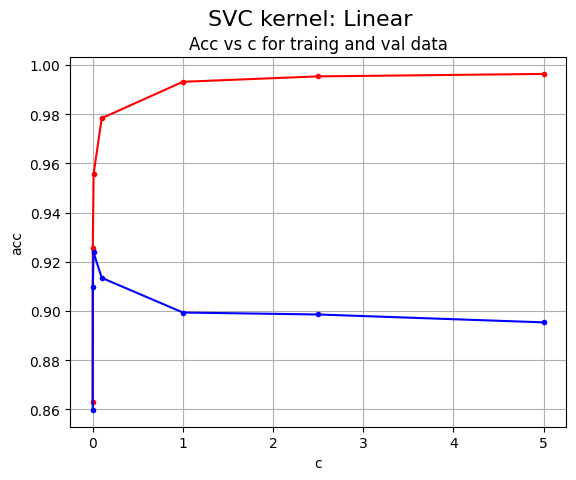

In [17]:
c_linear = [0.0001, 0.001, 0.01, 0.1, 1, 2.5, 5]
acc_train_linear = []
acc_test_linear = []

s_time = time.time()
for c in c_linear:
    svm_linear_PCA(c)
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_linear, acc_train_linear, '.-', color='red')
plt.plot(c_linear, acc_test_linear, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.suptitle('SVC kernel: Linear', fontsize=16)
plt.title('Acc vs c for traing and val data')
plt.grid()

Επαναλαμβάνω για poly και rbf πάλι στα διαστήματα που έχουμε βρει από πάνω.

In [18]:
from sklearn.svm import SVC

def svc_poly_PCA(c):
    svc_poly = SVC(kernel= 'poly', C = c)
    svc_poly.fit(X_mnt, y_mini)

    #pred values and accuracy on training
    y_pred_train = svc_poly.predict(X_mnt)
    acc_train = np.mean(y_pred_train == y_mini)
    acc_train_poly.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc_poly.predict(test_dnt)
    acc_test = np.mean(y_pred_test == test_labels)
    acc_test_poly.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'This accuracy scores are for C: {c}')

def svc_rbf_PCA(c, g):
    svc_rbf = SVC(kernel='rbf', C=c, gamma=g)
    svc_rbf.fit(X_mnt, y_mini)

    #pred values and accuracy on train
    y_pred_train = svc_rbf.predict(X_mnt)
    acc_train = np.mean(y_pred_train == y_mini)
    acc_train_rbf.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc_rbf.predict(test_dnt)
    acc_test = np.mean(y_pred_test == test_labels)
    acc_test_rbf.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'The C is: {c} and the gamma is: {g}')

    return acc_train, acc_test

Train accuracy: 0.490000
Test accuracy: 0.463100
This accuracy scores are for C: 0.0001
Train accuracy: 0.490000
Test accuracy: 0.463100
This accuracy scores are for C: 0.0005
Train accuracy: 0.490000
Test accuracy: 0.463100
This accuracy scores are for C: 0.001
Train accuracy: 0.502000
Test accuracy: 0.472000
This accuracy scores are for C: 0.005
Train accuracy: 0.524000
Test accuracy: 0.487300
This accuracy scores are for C: 0.01
Train accuracy: 0.819200
Test accuracy: 0.782500
This accuracy scores are for C: 0.05
Train accuracy: 0.914200
Test accuracy: 0.876500
This accuracy scores are for C: 0.1
Train accuracy: 0.986400
Test accuracy: 0.950200
This accuracy scores are for C: 0.5
Train accuracy: 0.994000
Test accuracy: 0.955700
This accuracy scores are for C: 1
Durration: 21.74


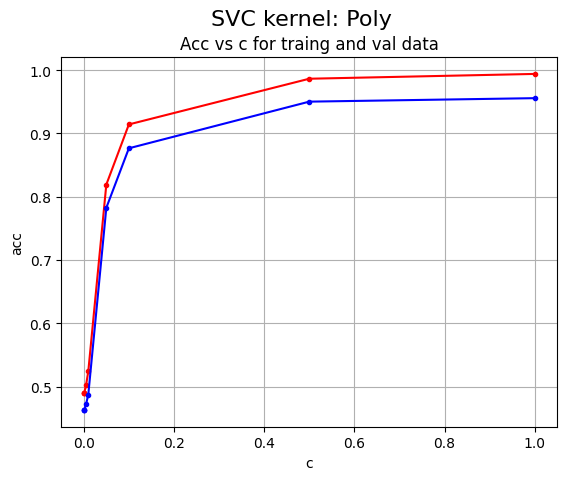

In [20]:
#gia na doyme poies time einia kales eos 1
acc_train_poly = []
acc_test_poly = []

c_poly_optimize = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
s_time = time.time()
for c in c_poly_optimize:
    svc_poly_PCA(c)
f_time = time.time()
dur = f_time - s_time
print(f'Durration: {dur:.2f}')

plt.plot(c_poly_optimize, acc_train_poly, '.-', color='red')
plt.plot(c_poly_optimize, acc_test_poly, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.suptitle('SVC kernel: Poly', fontsize=16)
plt.title('Acc vs c for traing and val data')
plt.grid()

Durration difference from poly C check without PCA and with PCA: 88.25 --> 21.14

Train accuracy: 0.823000
Test accuracy: 0.788500
The C is: 0.0001 and the gamma is: auto
Train accuracy: 0.823000
Test accuracy: 0.788500
The C is: 0.001 and the gamma is: auto
Train accuracy: 0.823000
Test accuracy: 0.788500
The C is: 0.01 and the gamma is: auto
Train accuracy: 0.885000
Test accuracy: 0.854600
The C is: 0.05 and the gamma is: auto
Train accuracy: 0.943200
Test accuracy: 0.911700
The C is: 0.1 and the gamma is: auto
Train accuracy: 0.991200
Test accuracy: 0.953600
The C is: 0.5 and the gamma is: auto
Train accuracy: 0.998000
Test accuracy: 0.960300
The C is: 1 and the gamma is: auto
Train accuracy: 1.000000
Test accuracy: 0.962200
The C is: 5 and the gamma is: auto
Train accuracy: 1.000000
Test accuracy: 0.962200
The C is: 10 and the gamma is: auto
Train accuracy: 1.000000
Test accuracy: 0.962200
The C is: 20 and the gamma is: auto
Durration: 51.93


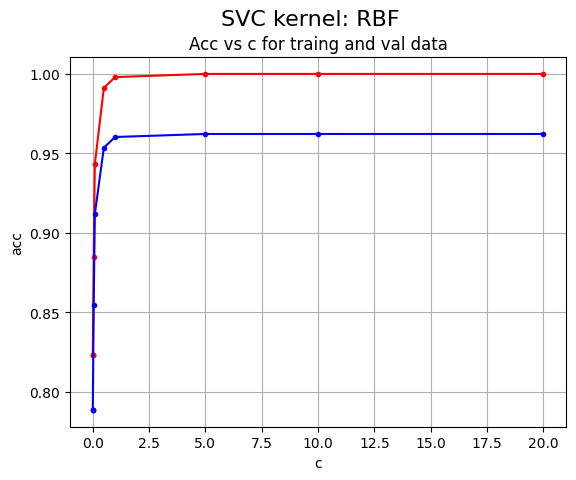

In [21]:
c_rbf= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20]
acc_train_rbf = []
acc_test_rbf = []

s_time = time.time()
for c in c_rbf:
    svc_rbf_PCA(c, 'auto')
f_time = time.time()
dur = f_time - s_time
print(f'Durration: {dur:.2f}')

plt.plot(c_rbf, acc_train_rbf, '.-', color='red')
plt.plot(c_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.suptitle('SVC kernel: RBF', fontsize=16)
plt.title('Acc vs c for traing and val data')
plt.grid()

In [16]:
c_rbf = [0.1, 0.5, 1, 2.5, 5]
gamma = [0.0001, 0.001, 0.01, 0.1]
acc_train_rbf = []
acc_val_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_mnt, y_mini, c, g)
        f_time = time.time()
        d= f_time - s_time
        print(f'Durration for C:{c} and gamma: {g} is {d} sec')

        results.append({'C':c, 'gamma':g, 'acc_train':acc_train, 'acc_val': acc_val})

f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {round(dur/60,2)} min')
df =pd.DataFrame(results)
df

Train accuracy: 0.708000
Validation accuracy: 0.686000
The C is: 0.1 and the gamma is: 0.0001
Durration for C:0.1 and gamma: 0.0001 is 2.3641088008880615 sec
Train accuracy: 0.886250
Validation accuracy: 0.877000
The C is: 0.1 and the gamma is: 0.001
Durration for C:0.1 and gamma: 0.001 is 1.7711741924285889 sec
Train accuracy: 0.944500
Validation accuracy: 0.911000
The C is: 0.1 and the gamma is: 0.01
Durration for C:0.1 and gamma: 0.01 is 1.7553939819335938 sec
Train accuracy: 0.941250
Validation accuracy: 0.156000
The C is: 0.1 and the gamma is: 0.1
Durration for C:0.1 and gamma: 0.1 is 2.3772552013397217 sec
Train accuracy: 0.847250
Validation accuracy: 0.828000
The C is: 0.5 and the gamma is: 0.0001
Durration for C:0.5 and gamma: 0.0001 is 1.926769733428955 sec
Train accuracy: 0.933000
Validation accuracy: 0.917000
The C is: 0.5 and the gamma is: 0.001
Durration for C:0.5 and gamma: 0.001 is 1.1129601001739502 sec
Train accuracy: 0.990000
Validation accuracy: 0.949000
The C is: 0.

,C,gamma,acc_train,acc_val
0,0.1,0.0001,0.70800,0.686
1,0.1,0.0010,0.88625,0.877
2,0.1,0.0100,0.94450,0.911
3,0.1,0.1000,0.94125,0.156
4,0.5,0.0001,0.84725,0.828
5,0.5,0.0010,0.93300,0.917
6,0.5,0.0100,0.99000,0.949
7,0.5,0.1000,0.99125,0.198
8,1.0,0.0001,0.88600,0.869
9,1.0,0.0010,0.94600,0.934


In [33]:
idmax = df['acc_val'].idxmax()
idmax

14

In [ ]:
from sklearn.svm import SVC

best_model = SVC(kernel='rbf',C=2.5, gamma=0.01)
s_time = time.time()
best_model.fit(X_mnt, y_mini)
f_time = time.time()
print(f'Fitting time is: {f_time - s_time}')
s_t = time.time()
y_pred_train = best_model.predict(X_mnt)
acc_train = np.mean(y_pred_train == y_mini)
f_t = time.time()
print('Train accuracy: {0:f}'.format(acc_train))
print(f'Training time: {f_t - s_t}')
s_t = time.time()
y_pred_test = best_model.predict(test_dnt)
acc_test = np.mean(y_pred_test == test_labels)
f_t = time.time()
print('Test accuracy: {0:f}'.format(acc_test))
print(f'Testing time: {f_t - s_t}')

Fitting time is: 0.5164265632629395
Train accuracy: 0.999600
Training time: 1.0007550716400146
Validation accuracy: 0.962800
Testing time: 2.0332841873168945


Durration difference from rbf C check without PCA and with PCA: 195.90 --> 52.97

Γενικά φαίνεται ότι με μείωση της διάστασης των δεδομένων με την PCA τα μοντέλα SVC για όλου σχεδόν του kernels και για το ίδιο διάστημα C τιμών φτάνουν ποιό γρήγορα σε καλύτερη απόδοση από αυτά στα όποια τα δεδομένα δεν έχουν εφαρμοστεί η τεχνική της PCA.  Αυτό απόδιδεται λογικά στο ότι επειδή αφαιρείτε ο θόρυβος και υπάρχει μείωση υπερπροσαρμογής αφού το PCA μετατρέπει τα δεδομένα σε σύνολο γραμμικά μη συσχετισμένων μεταβλητών.  Τέλος, βελτιώνεται η απόδοση λόγο της ύπαρξης λιγότερων χαρακτηριστικών και λόγο της συγκέντρωσης της πληροφορίας σε λιγότερες διαστάσεις. Επίσης αποφεύγεται το overfitting των δεδομένων.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Svc = SVC(kernel='rbf')
param_grid = {
    "C": [0.5, 1, 2.5, 5],
    "gamma": [0.001, 0.01, 0.1, 1]
}
s_t = time.time()
grid_search = GridSearchCV(Svc, param_grid, return_train_score= True)
grid_search.fit(X_mnt, y_mini)
f_t = time.time()
dur= f_t -s_t
print(f'time: {dur}')


time: 138.12463760375977


In [32]:
print(f'The best params are: {grid_search.best_params_}, their score is: {grid_search.best_score_}')

The best params are: {'C': 2.5, 'gamma': 0.01}, their score is: 0.9629999999999999


###  SVC on whole dataset.

In [22]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [23]:
from sklearn.decomposition import PCA

#normalize the dataset:
X_tr = normal(train_data)
X_tst = normal(test_data)

#apply PCA
pca = PCA(n_components=0.9)
pca.fit(X_tr)
X_train = pca.transform(X_tr)
X_test = pca.transform(X_tst)

print(X_train.shape, train_labels.shape)
print(X_test.shape, test_labels.shape)

(60000, 87) (60000,)
(10000, 87) (10000,)


In [24]:
from sklearn.svm import SVC

def svc(c,Kernel,g=None):

    if Kernel == 'linear':
        svc = SVC(kernel= Kernel, C = c)
        svc.fit(X_train, train_labels)

        #pred values and accuracy on training
        y_pred_train = svc.predict(X_train)
        acc_train = np.mean(y_pred_train == train_labels)
        acc_train_linear.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc.predict(X_test)
        acc_test = np.mean(y_pred_test == test_labels)
        acc_test_linear.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'This accuracy scores are for C: {c}')

    elif Kernel == 'poly':
        svc_poly = SVC(kernel= Kernel, C = c)
        svc_poly.fit(X_train, train_labels)

        #pred values and accuracy on training
        y_pred_train = svc_poly.predict(X_train)
        acc_train = np.mean(y_pred_train == train_labels)
        acc_train_poly.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc_poly.predict(X_test)
        acc_test = np.mean(y_pred_test == test_labels)
        acc_test_poly.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'This accuracy scores are for C: {c}')
        
    elif Kernel == 'rbf':
        svc_rbf = SVC(kernel=Kernel, C=c, gamma=g)
        svc_rbf.fit(X_train, train_labels)

        #pred values and accuracy on train
        y_pred_train = svc_rbf.predict(X_train)
        acc_train = np.mean(y_pred_train == train_labels)
        acc_train_rbf.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc_rbf.predict(X_test)
        acc_test = np.mean(y_pred_test == test_labels)
        acc_test_rbf.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'The C is: {c} and the gamma is: {g}')

    return acc_train, acc_test


Train accuracy: 0.913533
Test accuracy: 0.918300
This accuracy scores are for C: 0.0001
Train accuracy: 0.934667
Test accuracy: 0.938200
This accuracy scores are for C: 0.001
Train accuracy: 0.943450
Test accuracy: 0.942900
This accuracy scores are for C: 0.01
Train accuracy: 0.947400
Test accuracy: 0.945300
This accuracy scores are for C: 0.1
Train accuracy: 0.948350
Test accuracy: 0.943800
This accuracy scores are for C: 1
Train accuracy: 0.948500
Test accuracy: 0.943700
This accuracy scores are for C: 2.5
Train accuracy: 0.948550
Test accuracy: 0.943900
This accuracy scores are for C: 5
duration was: 543.02


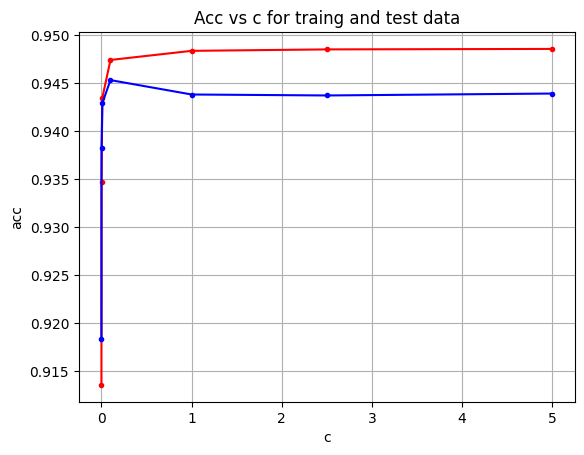

In [44]:
c_linear = [0.0001, 0.001, 0.01, 0.1, 1, 2.5, 5]
acc_train_linear = []
acc_test_linear = []

s_time = time.time()
for c in c_linear:
    svc(c, Kernel='linear')
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_linear, acc_train_linear, '.-', color='red')
plt.plot(c_linear, acc_test_linear, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.suptitle('SVC kernel: Linear', fontsize=16)
plt.title('Acc vs c for traing and test data')
plt.grid()

Train accuracy: 0.112367
Test accuracy: 0.113500
This accuracy scores are for C: 0.0001
Durration for C: 0.0001 is 336.98627185821533sec
Train accuracy: 0.337217
Test accuracy: 0.345500
This accuracy scores are for C: 0.001
Durration for C: 0.001 is 329.048823595047sec
Train accuracy: 0.910900
Test accuracy: 0.913700
This accuracy scores are for C: 0.01
Durration for C: 0.01 is 202.16910767555237sec
Train accuracy: 0.963133
Test accuracy: 0.961400
This accuracy scores are for C: 0.05
Durration for C: 0.05 is 91.31310749053955sec
Train accuracy: 0.974350
Test accuracy: 0.970100
This accuracy scores are for C: 0.1
Durration for C: 0.1 is 72.26267647743225sec
Train accuracy: 0.990783
Test accuracy: 0.980900
This accuracy scores are for C: 0.5
Durration for C: 0.5 is 41.14816665649414sec
Train accuracy: 0.995400
Test accuracy: 0.983300
This accuracy scores are for C: 1
Durration for C: 1 is 37.06775760650635sec
Train accuracy: 0.998533
Test accuracy: 0.984500
This accuracy scores are for C

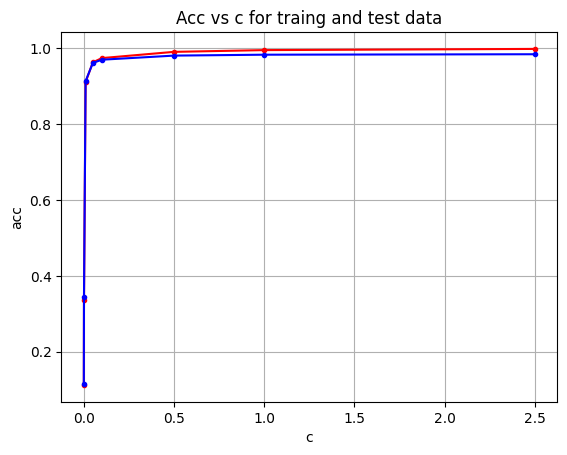

In [ ]:
c_poly_optimize = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2.5]
acc_train_poly = []
acc_test_poly = []

s_time_f = time.time()
for c in c_poly_optimize:
    s_time = time.time()
    svc(c,Kernel='poly')
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for C: {c} is {d}sec')
f_time_f = time.time()
dur = f_time_f - s_time_f
print(f'Durration: {dur:.2f}')

plt.plot(c_poly_optimize, acc_train_poly, '.-', color='red')
plt.plot(c_poly_optimize, acc_test_poly, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

Train accuracy: 0.112367
Test accuracy: 0.113500
The C is: 0.0001 and the gamma is: auto
Durration for C: 0.0001 is 540.5078716278076sec
Train accuracy: 0.243333
Test accuracy: 0.246100
The C is: 0.001 and the gamma is: auto
Durration for C: 0.001 is 540.8874006271362sec
Train accuracy: 0.919917
Test accuracy: 0.925300
The C is: 0.01 and the gamma is: auto
Durration for C: 0.01 is 369.2283265590668sec
Train accuracy: 0.965217
Test accuracy: 0.961200
The C is: 0.05 and the gamma is: auto
Durration for C: 0.05 is 203.77809977531433sec
Train accuracy: 0.976367
Test accuracy: 0.969600
The C is: 0.1 and the gamma is: auto
Durration for C: 0.1 is 158.82093811035156sec
Train accuracy: 0.994150
Test accuracy: 0.982400
The C is: 0.5 and the gamma is: auto
Durration for C: 0.5 is 111.5102927684784sec
Train accuracy: 0.998183
Test accuracy: 0.986000
The C is: 1 and the gamma is: auto
Durration for C: 1 is 107.72950458526611sec
Train accuracy: 0.999750
Test accuracy: 0.986900
The C is: 2.5 and the

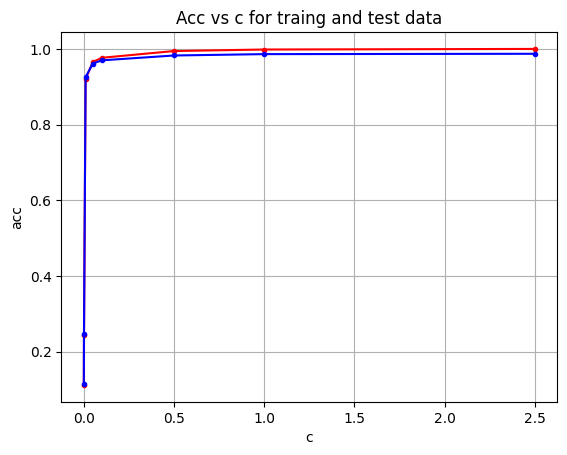

In [17]:
#Gia eksikonomisi xronou den tha to trexw gia ton rbf auto giati mporei na parei para poly xrono. 
#Tha trextoun merika paradeigmata poy kseroume oti exoume kalh apodosi apo to proigoymeno meiweno dataset
# c_rbf= [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2.5, 5]

c_rbf= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2.5]
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for c in c_rbf:
    s_time = time.time()
    svc(c, Kernel='rbf', g='auto')
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for C: {c} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(c_rbf, acc_train_rbf, '.-', color='red')
plt.plot(c_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

Train accuracy: 0.955783
Test accuracy: 0.956400
The C is: 0.5 and the gamma is: 0.001
Durration for gamma: 0.001 is 113.36810517311096sec
Train accuracy: 0.993017
Test accuracy: 0.982700
The C is: 0.5 and the gamma is: 0.01
Durration for gamma: 0.01 is 103.8061752319336sec
Train accuracy: 0.986317
Test accuracy: 0.681400
The C is: 0.5 and the gamma is: 0.05
Durration for gamma: 0.05 is 597.0157406330109sec
Train accuracy: 0.722717
Test accuracy: 0.241900
The C is: 0.5 and the gamma is: 0.1
Durration for gamma: 0.1 is 617.5493957996368sec
Durration: 1431.74


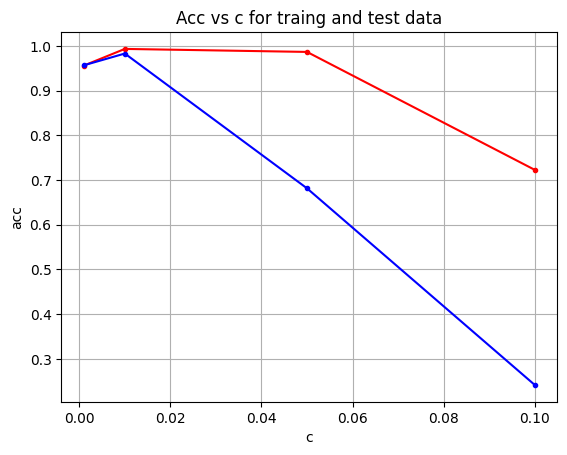

In [27]:
gamma= [0.001, 0.01, 0.05, 0.1]
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for g in gamma:
    s_time = time.time()
    svc(c = 0.5, Kernel='rbf', g= g)
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for gamma: {g} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(gamma, acc_train_rbf, '.-', color='red')
plt.plot(gamma, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

In [44]:
X_train.shape

(60000, 87)

In [46]:
train_labels.shape

(60000,)

In [25]:
c_rbf = [1, 2.5, 5]
gamma = [0.008, 0.01, 0.025]
acc_train_rbf = []
acc_val_rbf = []
results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_train, train_labels, c, g)
        f_time = time.time()
        d= f_time - s_time
        print(f'Durration for C:{c} and gamma: {g} is {d} sec')

        results.append({'C':c, 'gamma':g, 'acc_train':acc_train, 'acc_val': acc_val})

f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur} sec')
df =pd.DataFrame(results)
df

Train accuracy: 0.996271
Validation accuracy: 0.984333
The C is: 1 and the gamma is: 0.008
Durration for C:1 and gamma: 0.008 is 68.61493921279907 sec
Train accuracy: 0.997646
Validation accuracy: 0.984917
The C is: 1 and the gamma is: 0.01
Durration for C:1 and gamma: 0.01 is 79.29347658157349 sec
Train accuracy: 0.999750
Validation accuracy: 0.976833
The C is: 1 and the gamma is: 0.025
Durration for C:1 and gamma: 0.025 is 236.85847401618958 sec
Train accuracy: 0.999354
Validation accuracy: 0.986500
The C is: 2.5 and the gamma is: 0.008
Durration for C:2.5 and gamma: 0.008 is 65.27624750137329 sec
Train accuracy: 0.999625
Validation accuracy: 0.986583
The C is: 2.5 and the gamma is: 0.01
Durration for C:2.5 and gamma: 0.01 is 79.36044812202454 sec
Train accuracy: 0.999979
Validation accuracy: 0.977583
The C is: 2.5 and the gamma is: 0.025
Durration for C:2.5 and gamma: 0.025 is 228.2300944328308 sec
Train accuracy: 0.999875
Validation accuracy: 0.986750
The C is: 5 and the gamma is: 

,C,gamma,acc_train,acc_val
0,1.0,0.008,0.996271,0.984333
1,1.0,0.010,0.997646,0.984917
2,1.0,0.025,0.999750,0.976833
3,2.5,0.008,0.999354,0.986500
4,2.5,0.010,0.999625,0.986583
5,2.5,0.025,0.999979,0.977583
6,5.0,0.008,0.999875,0.986750
7,5.0,0.010,0.999938,0.986750
8,5.0,0.025,1.000000,0.977583


In [26]:
idmax = df['acc_val'].idxmax()
idmax

6

In [21]:
# Θα κάνω και ένα grid search για τα καλά C για να βρούμε και το καλύτερο gamma, den exei nohma na allazei to C, giati oso megalytero C toso kalyterh apodosi opote pairnoyme to C=0.5
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Svc = SVC(kernel='rbf')
param_grid = {
    "C": [0.5],
    "gamma": [0.001, 0.01, 0.1, 1]
}
s_t = time.time()
grid_search = GridSearchCV(Svc, param_grid, return_train_score= True)
grid_search.fit(X_train, train_labels)
f_t = time.time()
dur= f_t -s_t
print(f'time: {dur}')

print(f'The best params are: {grid_search.best_params_}, their score is: {grid_search.best_score_}')

time: 5101.270339012146
The best params are: {'C': 0.5, 'gamma': 0.01}, their score is: 0.9810333333333332


### Best model

Από τα παραπάνω παραδείγματα φαίνεται ότι ο linear kernel αν και πιο γρήγορος (επειδή είναι και πιο απλός), καταφέρνει την μικρότερη απόδοση σε σχέση με τους υπολοίπους με αυτή να είναι: Train accuracy: 0.947400 Test accuracy: 0.945300 για C = 0.1

O poly αν και λίγο πιο αργός από τον linear πετυχαίνει καλύτερη απόδοση για λίγο μεγαλύτερο C με αυτή να ανεβαίνει όσο το ανεβάζουμε, πράγμα που βγάζει και νόημα αφού πιέζουμε το μοντέλο να εφαρμόσει τις γκαυσιανές πιο πιεσμένες για τα δεδομένα. Καλύτερα αποτελέσματα: Train accuracy: 0.990783 Test accuracy: 0.9809 για C=0.5 και χρόνο: 41.1481 sec

Ο καλύτερος είναι ο rbf kernel αν και παίρνει πιο πολύ ώρα πετυχαίνει καλύτερη απόδοση για το ίδιο C με το poly. Τα αποτελέσματα είναι: Train accuracy: 0.994150, Test accuracy: 0.982400
The C is: 0.5 and the gamma is: auto Durration for C: 0.5 is 111.5102927684784sec

In [20]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf', C=5, gamma=0.008)
s_t = time.time()
svc_rbf.fit(X_train, train_labels)
f_t = time.time()
d = f_t - s_t

In [21]:
y_pred_train = svc_rbf.predict(X_train)
acc_train = np.mean(y_pred_train == train_labels)
print('Train accuracy: {0:f}'.format(acc_train))

Train accuracy: 0.999850


In [22]:
y_pred_test = svc_rbf.predict(X_test)
acc_test = np.mean(y_pred_test == test_labels)
print('Test accuracy: {0:f}'.format(acc_test))

Test accuracy: 0.986200


Train accuracy: 0.994150, Test accuracy: 0.982400, time: 1m 54sec

### Best model without normalization + PCA

In [27]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)
max_value = np.max(train_data)
mean_value = np.mean(train_data)
print(max_value)
print(mean_value)

(60000, 784) (60000,)
(10000, 784) (10000,)
255
33.318421449829934


In [28]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf', C=0.5, gamma='auto')
s_t = time.time()
svc_rbf.fit(train_data, train_labels)
f_t = time.time()
d = f_t - s_t

In [29]:
y_pred_train = svc_rbf.predict(train_data)
acc_train = np.mean(y_pred_train == train_labels)
print('Train accuracy: {0:f}'.format(acc_train))
y_pred_test = svc_rbf.predict(test_data)
acc_test = np.mean(y_pred_test == test_labels)
print('Test accuracy: {0:f}'.format(acc_test))

Train accuracy: 0.112367
Test accuracy: 0.113500


In [31]:
d/60

72.92130468289058

Train accuracy: 0.112367, Test accuracy: 0.113500, fitting 72.92min, else 31min

### Best model without normalization

In [17]:
train_data_n = normal(train_data)
test_data_n = normal(test_data)
print(train_data_n.shape, train_labels.shape)
print(test_data_n.shape, test_labels.shape)
max_value = np.max(train_data_n)
mean_value = np.mean(test_data_n)
print(max_value)
print(mean_value)

(60000, 784) (60000,)
(10000, 784) (10000,)
1.0
-0.7349707883153258


In [18]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf', C=5, gamma=0.008)
s_t = time.time()
svc_rbf.fit(train_data_n, train_labels)
f_t = time.time()
d = f_t - s_t

In [19]:
y_pred_train = svc_rbf.predict(train_data_n)
acc_train = np.mean(y_pred_train == train_labels)
print('Train accuracy: {0:f}'.format(acc_train))
y_pred_test = svc_rbf.predict(test_data_n)
acc_test = np.mean(y_pred_test == test_labels)
print('Test accuracy: {0:f}'.format(acc_test))

Train accuracy: 0.999983
Test accuracy: 0.985900


Train accuracy: 0.964000
Test accuracy: 0.960500
time: 8m 15sec

### Compare with Nearest Neighbor and Nearest Class Centroid

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,20,2):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    s_t = time.time()
    knn.fit(X_train, train_labels)
    f_t = time.time()
    print(f'KNN with n_neighbors={k} training time: {f_t - s_t} sec')

    s_t = time.time()
    score = knn.score(X_test, test_labels)
    f_t = time.time()
    print(f'KNN with n_neighbors={k} test time: {f_t - s_t} sec')

    print(f'Accuracy for k_neighbors={k} is, acc = {round(score*100,2)}')
    acc_KNN.append(score)

KNN with n_neighbors=1 training time: 0.005621671676635742 sec
KNN with n_neighbors=1 test time: 0.8995907306671143 sec
Accuracy for k_neighbors=1 is, acc = 97.34
KNN with n_neighbors=3 training time: 0.008337974548339844 sec
KNN with n_neighbors=3 test time: 0.7124502658843994 sec
Accuracy for k_neighbors=3 is, acc = 97.35
KNN with n_neighbors=5 training time: 0.00930929183959961 sec
KNN with n_neighbors=5 test time: 0.7532098293304443 sec
Accuracy for k_neighbors=5 is, acc = 97.28
KNN with n_neighbors=7 training time: 0.00879526138305664 sec
KNN with n_neighbors=7 test time: 0.7245044708251953 sec
Accuracy for k_neighbors=7 is, acc = 97.41
KNN with n_neighbors=9 training time: 0.008335113525390625 sec
KNN with n_neighbors=9 test time: 0.7385234832763672 sec
Accuracy for k_neighbors=9 is, acc = 97.27
KNN with n_neighbors=11 training time: 0.00592350959777832 sec
KNN with n_neighbors=11 test time: 0.7375080585479736 sec
Accuracy for k_neighbors=11 is, acc = 97.03
KNN with n_neighbors=1

In [20]:
best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,20,2)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 97.41% with n_neighbors = 7


In [27]:
knn = KNN(n_neighbors=7, n_jobs=-1).fit(X_train, train_labels)
train_score = knn.score(X_train, train_labels)
print(f'Train accuracy is: {train_score*100:.2f}%')

Train accuracy is: 98.20%


In [28]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
s_t = time.time()
clf.fit(X_train, train_labels)
f_t = time.time()
# print(f'Nearset Centroid training time: {f_t - s_t} sec')

s_t = time.time()
score = clf.score(X_test, test_labels)
f_t = time.time()
# print(f'Nearset Centroid test time: {f_t - s_t} sec')

print(f'Accuracy for Nearset Centroid is, acc = {round(score*100,2)}')

Accuracy for Nearset Centroid is, acc = 81.96


In [29]:
train_score = clf.score(X_train, train_labels)
print(f'Train accuracy is: {train_score*100:.2f}%')

Train accuracy is: 80.75%


### And now apply the knowledge from above to the Cifar-10

In [30]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape of x_train:", x_train.shape) 
print("Shape of y_train:", y_train.shape) 
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


(50000, 32, 32, 3)


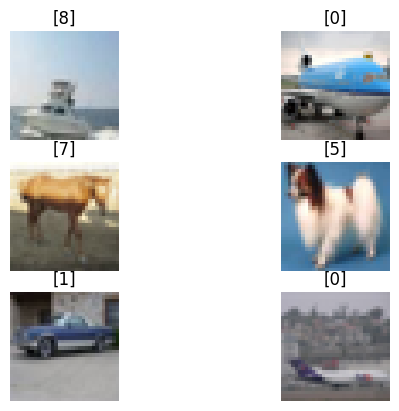

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# show some images 
print(x_train.shape)

plt.subplot(321)
plt.imshow(x_train[100])
plt.axis('off')
plt.title(y_train[100])
plt.subplot(322)
plt.imshow(x_train[700])
plt.axis('off')
plt.title(y_train[700])
plt.subplot(323)
plt.imshow(x_train[2000])
plt.axis('off')
plt.title(y_train[2000])
plt.subplot(324)
plt.imshow(x_train[4000])
plt.axis('off')
plt.title(y_train[4000])
plt.subplot(325)
plt.imshow(x_train[10000])
plt.axis('off')
plt.title(y_train[10000])
plt.subplot(326)
plt.imshow(x_train[30000])
plt.axis('off')
plt.title(y_train[30000])

plt.show()

In [32]:
x_train_mini = x_train[0:10000]
y_train_mini = y_train[0:10000]
x_train_m = x_train_mini.reshape(x_train_mini.shape[0], -1)
y_train_m = y_train_mini.reshape(y_train_mini.shape[0])
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0])
print(x_train_m.shape)
print(y_train_m.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 3072)
(10000,)
(10000, 3072)
(10000,)


#### Normalization and PCA application

In [33]:
import numpy as np

def normal(X_mini):
    #dedomeno oti einai eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

x_train_nm = normal(x_train_m)
x_test_nm = normal(x_test)

max_value = np.max(x_test_nm)
min_value = np.min(x_test_nm)
mean_value = np.mean(x_test_nm)
print(max_value)
print(min_value)
print(mean_value)

1.0
-1.0
-0.0468301588031046


In [34]:
l_svc = SVC(kernel='linear', C=2.5).fit(x_train_nm, y_train_m)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
pca.fit(x_train_nm)

#X_mnt = X_mini_normalized_PCAtransformed, test_dnt = test_data_normalized_PCAtransformed
X_mnt = pca.transform(x_train_nm)
test_dnt = pca.transform(x_test_nm)

print(X_mnt.shape)
print(y_train_m.shape)
print(test_dnt.shape)
print(y_test.shape)
print(x_train_nm.shape)

(10000, 96)
(10000,)
(10000, 96)
(10000,)
(10000, 3072)


In [37]:
l_svc_p = SVC(kernel='linear', C=2.5).fit(X_mnt, y_train_m)

SVC Linear, Poly and rbf for mini 

In [32]:
from sklearn.svm import SVC

def svc(c,Kernel,g=None):

    if Kernel == 'linear':
        svc = SVC(kernel= Kernel, C = c)
        svc.fit(X_mnt, y_train_m)

        #pred values and accuracy on training
        y_pred_train = svc.predict(X_mnt)
        acc_train = np.mean(y_pred_train == y_train_m)
        acc_train_linear.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc.predict(test_dnt)
        acc_test = np.mean(y_pred_test == y_test)
        acc_test_linear.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'This accuracy scores are for C: {c}')

    elif Kernel == 'poly':
        svc_poly = SVC(kernel= Kernel, C = c)
        svc_poly.fit(X_mnt, y_train_m)

        #pred values and accuracy on training
        y_pred_train = svc_poly.predict(X_mnt)
        acc_train = np.mean(y_pred_train == y_train_m)
        acc_train_poly.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc_poly.predict(test_dnt)
        acc_test = np.mean(y_pred_test == y_test)
        acc_test_poly.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'This accuracy scores are for C: {c}')
        
    elif Kernel == 'rbf':
        svc_rbf = SVC(kernel=Kernel, C=c, gamma=g)
        svc_rbf.fit(X_mnt, y_train_m)

        #pred values and accuracy on train
        y_pred_train = svc_rbf.predict(X_mnt)
        acc_train = np.mean(y_pred_train == y_train_m)
        acc_train_rbf.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc_rbf.predict(test_dnt)
        acc_test = np.mean(y_pred_test == y_test)
        acc_test_rbf.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'The C is: {c} and the gamma is: {g}')

    else:
        print(f'The kernel: {Kernel}, doesnt match any SVC')

    return acc_train, acc_test


Train accuracy: 0.376100
Test accuracy: 0.362600
This accuracy scores are for C: 0.0001
Train accuracy: 0.424300
Test accuracy: 0.394800
This accuracy scores are for C: 0.001
Train accuracy: 0.445900
Test accuracy: 0.388300
This accuracy scores are for C: 0.01
Train accuracy: 0.450000
Test accuracy: 0.382900
This accuracy scores are for C: 0.1
Train accuracy: 0.447900
Test accuracy: 0.381800
This accuracy scores are for C: 1
Train accuracy: 0.448400
Test accuracy: 0.382400
This accuracy scores are for C: 5
duration was: 938.26


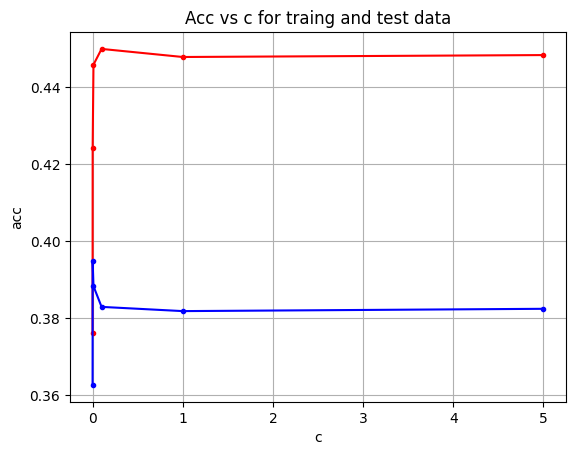

In [28]:
c_linear = [0.0001, 0.001, 0.01, 0.1, 1, 5]
acc_train_linear = []
acc_test_linear = []

s_time = time.time()
for c in c_linear:
    svc(c, Kernel='linear')
f_time = time.time()
dur = f_time - s_time
print(f'duration was: {dur:.2f}')

plt.plot(c_linear, acc_train_linear, '.-', color='red')
plt.plot(c_linear, acc_test_linear, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()
# phre 170 lepta gia na vgalei mexri t0 c10

Train accuracy: 0.103200
Test accuracy: 0.100000
This accuracy scores are for C: 0.0001
Durration for C: 0.0001 is 9.358635425567627sec
Train accuracy: 0.115000
Test accuracy: 0.111500
This accuracy scores are for C: 0.001
Durration for C: 0.001 is 9.227784395217896sec
Train accuracy: 0.200400
Test accuracy: 0.187400
This accuracy scores are for C: 0.01
Durration for C: 0.01 is 8.921199560165405sec
Train accuracy: 0.325000
Test accuracy: 0.279200
This accuracy scores are for C: 0.05
Durration for C: 0.05 is 8.701112747192383sec
Train accuracy: 0.377700
Test accuracy: 0.310700
This accuracy scores are for C: 0.1
Durration for C: 0.1 is 8.54944109916687sec
Train accuracy: 0.557200
Test accuracy: 0.368200
This accuracy scores are for C: 0.5
Durration for C: 0.5 is 8.32156252861023sec
Train accuracy: 0.655000
Test accuracy: 0.383900
This accuracy scores are for C: 1
Durration for C: 1 is 8.345109939575195sec
Train accuracy: 0.785500
Test accuracy: 0.394600
This accuracy scores are for C: 2

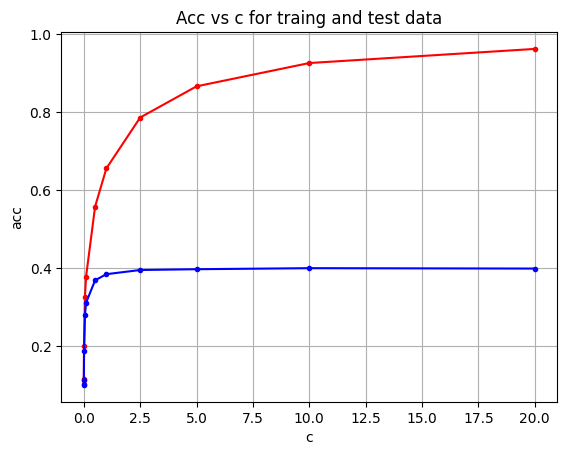

In [31]:
c_poly_optimize = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2.5, 5, 10, 20]
acc_train_poly = []
acc_test_poly = []

s_time_f = time.time()
for c in c_poly_optimize:
    s_time = time.time()
    svc(c,Kernel='poly')
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for C: {c} is {d}sec')
f_time_f = time.time()
dur = f_time_f - s_time_f
print(f'Durration: {dur:.2f}')

plt.plot(c_poly_optimize, acc_train_poly, '.-', color='red')
plt.plot(c_poly_optimize, acc_test_poly, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

In [34]:
import pandas as pd

data = { 'C': c_poly_optimize, 'acc_train': acc_train_poly, 'acc_test': acc_test_poly }
acc_poly = pd.DataFrame(data)
acc_poly.set_index('C', inplace=True)
print(acc_poly)

         acc_train  acc_test
C                           
0.0001      0.1032    0.1000
0.0010      0.1150    0.1115
0.0100      0.2004    0.1874
0.0500      0.3250    0.2792
0.1000      0.3777    0.3107
0.5000      0.5572    0.3682
1.0000      0.6550    0.3839
2.5000      0.7855    0.3946
5.0000      0.8655    0.3966
10.0000     0.9252    0.3993
20.0000     0.9614    0.3983


Train accuracy: 0.103200
Test accuracy: 0.100000
The C is: 0.0001 and the gamma is: auto
Durration for C: 0.0001 is 19.859712839126587sec
Train accuracy: 0.103200
Test accuracy: 0.100000
The C is: 0.001 and the gamma is: auto
Durration for C: 0.001 is 20.24194598197937sec
Train accuracy: 0.103200
Test accuracy: 0.100000
The C is: 0.01 and the gamma is: auto
Durration for C: 0.01 is 21.098862409591675sec
Train accuracy: 0.135000
Test accuracy: 0.126600
The C is: 0.05 and the gamma is: auto
Durration for C: 0.05 is 20.381120920181274sec
Train accuracy: 0.175200
Test accuracy: 0.147900
The C is: 0.1 and the gamma is: auto
Durration for C: 0.1 is 20.1096088886261sec
Train accuracy: 0.809200
Test accuracy: 0.253500
The C is: 0.5 and the gamma is: auto
Durration for C: 0.5 is 20.06342124938965sec
Train accuracy: 0.987000
Test accuracy: 0.378700
The C is: 1 and the gamma is: auto
Durration for C: 1 is 20.745718717575073sec
Train accuracy: 0.999800
Test accuracy: 0.389600
The C is: 2.5 and the

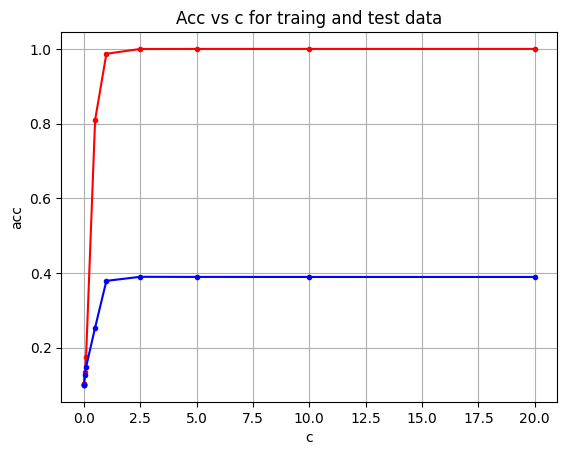

In [ ]:
c_rbf= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2.5, 5, 10, 20]
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for c in c_rbf:
    s_time = time.time()
    svc(c, Kernel='rbf', g='scale')
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for C: {c} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(c_rbf, acc_train_rbf, '.-', color='red')
plt.plot(c_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

In [35]:
data = { 'C': c_rbf, 'acc_train': acc_train_rbf, 'acc_test': acc_test_rbf }
acc_rbf = pd.DataFrame(data)
acc_rbf.set_index('C', inplace=True)
print(acc_rbf)

         acc_train  acc_test
C                           
0.0001      0.1032    0.1000
0.0010      0.1032    0.1000
0.0100      0.1032    0.1000
0.0500      0.1350    0.1266
0.1000      0.1752    0.1479
0.5000      0.8092    0.2535
1.0000      0.9870    0.3787
2.5000      0.9998    0.3896
5.0000      1.0000    0.3893
10.0000     1.0000    0.3892
20.0000     1.0000    0.3892


Train accuracy: 0.442800
Test accuracy: 0.411000
The C is: 2.5 and the gamma is: 0.0001
Durration for gamma: 0.0001 is 17.35572624206543sec
Train accuracy: 0.717500
Test accuracy: 0.476700
The C is: 2.5 and the gamma is: 0.001
Durration for gamma: 0.001 is 16.5245304107666sec
Train accuracy: 0.999600
Test accuracy: 0.395300
The C is: 2.5 and the gamma is: 0.01
Durration for gamma: 0.01 is 20.55509877204895sec
Train accuracy: 1.000000
Test accuracy: 0.133800
The C is: 2.5 and the gamma is: 0.05
Durration for gamma: 0.05 is 20.955024242401123sec
Train accuracy: 1.000000
Test accuracy: 0.102400
The C is: 2.5 and the gamma is: 0.1
Durration for gamma: 0.1 is 20.886874675750732sec
Train accuracy: 1.000000
Test accuracy: 0.100100
The C is: 2.5 and the gamma is: 0.5
Durration for gamma: 0.5 is 26.453882455825806sec
Train accuracy: 1.000000
Test accuracy: 0.100000
The C is: 2.5 and the gamma is: 1
Durration for gamma: 1 is 34.27358651161194sec
Train accuracy: 1.000000
Test accuracy: 0.100000
T

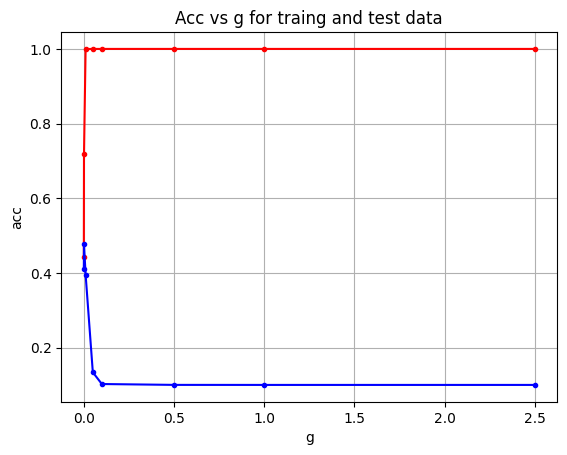

In [42]:
g_rbf= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2.5]
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for g in g_rbf:
    s_time = time.time()
    svc(2.5, Kernel='rbf', g=g)
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for gamma: {g} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(g_rbf, acc_train_rbf, '.-', color='red')
plt.plot(g_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('g')
plt.ylabel('acc')
plt.title('Acc vs g for traing and test data')
plt.grid()

Train accuracy: 0.442800
Test accuracy: 0.411000
The C is: 2.5 and the gamma is: 0.0001
Durration for gamma: 0.0001 is 17.110239267349243sec
Train accuracy: 0.717500
Test accuracy: 0.476700
The C is: 2.5 and the gamma is: 0.001
Durration for gamma: 0.001 is 16.361647844314575sec
Train accuracy: 0.929800
Test accuracy: 0.479800
The C is: 2.5 and the gamma is: 0.0025
Durration for gamma: 0.0025 is 18.50993013381958sec
Train accuracy: 0.989400
Test accuracy: 0.464000
The C is: 2.5 and the gamma is: 0.005
Durration for gamma: 0.005 is 20.119889974594116sec
Train accuracy: 0.998200
Test accuracy: 0.429500
The C is: 2.5 and the gamma is: 0.0075
Durration for gamma: 0.0075 is 20.401609420776367sec
Train accuracy: 0.999600
Test accuracy: 0.395300
The C is: 2.5 and the gamma is: 0.01
Durration for gamma: 0.01 is 20.541269779205322sec
Durration: 113.05


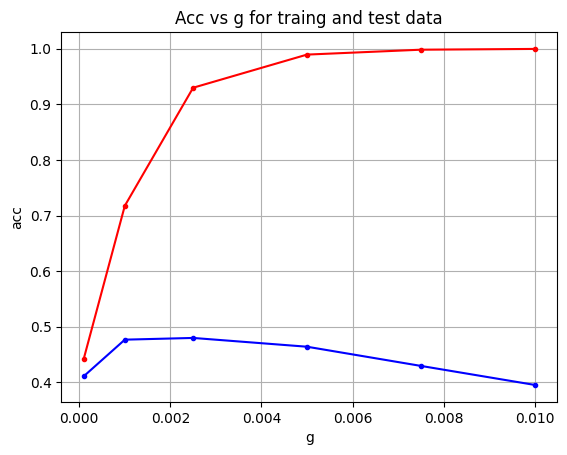

In [39]:
g_rbf= [0.0001, 0.001, 0.0025, 0.005, 0.0075, 0.01]
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for g in g_rbf:
    s_time = time.time()
    svc(2.5, Kernel='rbf', g=g)
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for gamma: {g} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(g_rbf, acc_train_rbf, '.-', color='red')
plt.plot(g_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('g')
plt.ylabel('acc')
plt.title('Acc vs g for traing and test data')
plt.grid()

Train accuracy: 0.103200
Test accuracy: 0.100000
The C is: 0.001 and the gamma is: 0.0025
Durration for C: 0.001 is 20.101094961166382sec
Train accuracy: 0.207800
Test accuracy: 0.200600
The C is: 0.01 and the gamma is: 0.0025
Durration for C: 0.01 is 19.765626192092896sec
Train accuracy: 0.429200
Test accuracy: 0.383200
The C is: 0.1 and the gamma is: 0.0025
Durration for C: 0.1 is 18.329660654067993sec
Train accuracy: 0.643600
Test accuracy: 0.453500
The C is: 0.5 and the gamma is: 0.0025
Durration for C: 0.5 is 17.45900535583496sec
Train accuracy: 0.785200
Test accuracy: 0.474100
The C is: 1 and the gamma is: 0.0025
Durration for C: 1 is 17.42333197593689sec
Train accuracy: 0.929800
Test accuracy: 0.479800
The C is: 2.5 and the gamma is: 0.0025
Durration for C: 2.5 is 18.596127033233643sec
Train accuracy: 0.976400
Test accuracy: 0.474700
The C is: 5 and the gamma is: 0.0025
Durration for C: 5 is 19.44240975379944sec
Train accuracy: 0.993900
Test accuracy: 0.467200
The C is: 10 and t

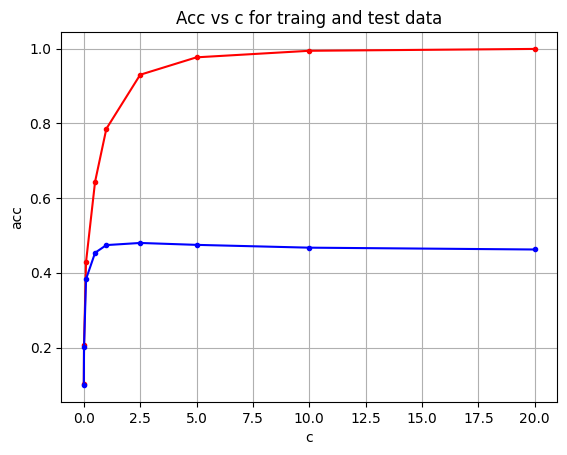

In [40]:
c_rbf= [0.001, 0.01, 0.1, 0.5, 1, 2.5, 5, 10, 20]
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for c in c_rbf:
    s_time = time.time()
    svc(c, Kernel='rbf', g=0.0025)
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for C: {c} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(c_rbf, acc_train_rbf, '.-', color='red')
plt.plot(c_rbf, acc_test_rbf, '.-', color='blue')
plt.xlabel('c')
plt.ylabel('acc')
plt.title('Acc vs c for traing and test data')
plt.grid()

In [41]:
data = { 'C': c_rbf, 'acc_train': acc_train_rbf, 'acc_test': acc_test_rbf }
acc_rbf = pd.DataFrame(data)
acc_rbf.set_index('C', inplace=True)
print(acc_rbf)

        acc_train  acc_test
C                          
0.001      0.1032    0.1000
0.010      0.2078    0.2006
0.100      0.4292    0.3832
0.500      0.6436    0.4535
1.000      0.7852    0.4741
2.500      0.9298    0.4798
5.000      0.9764    0.4747
10.000     0.9939    0.4672
20.000     0.9989    0.4623


In [33]:
c_rbf= [0.05, 0.1, 0.5, 1, 2.5, 5]
gamma= [0.0001, 0.001, 0.01, 0.1]
acc_train_rbf = []
acc_val_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_mnt, y_train_m, c, g)
        f_time = time.time()
        d=f_time - s_time
        print(f'Durration for C: {c} and gamma: {g} is {d}sec')

        results.append({'C': c, 'gamma': g, 'acc_train': acc_train, 'acc_val': acc_val})
        
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

df = pd.DataFrame(results)
df

Train accuracy: 0.242875
Validation accuracy: 0.212500
The C is: 0.05 and the gamma is: 0.0001
Durration for C: 0.05 and gamma: 0.0001 is 8.982173681259155sec
Train accuracy: 0.358125
Validation accuracy: 0.319000
The C is: 0.05 and the gamma is: 0.001
Durration for C: 0.05 and gamma: 0.001 is 8.46035122871399sec
Train accuracy: 0.147375
Validation accuracy: 0.136000
The C is: 0.05 and the gamma is: 0.01
Durration for C: 0.05 and gamma: 0.01 is 9.286137819290161sec
Train accuracy: 0.103250
Validation accuracy: 0.103000
The C is: 0.05 and the gamma is: 0.1
Durration for C: 0.05 and gamma: 0.1 is 9.630160808563232sec
Train accuracy: 0.285500
Validation accuracy: 0.252500
The C is: 0.1 and the gamma is: 0.0001
Durration for C: 0.1 and gamma: 0.0001 is 8.874886989593506sec
Train accuracy: 0.400875
Validation accuracy: 0.360000
The C is: 0.1 and the gamma is: 0.001
Durration for C: 0.1 and gamma: 0.001 is 8.233171701431274sec
Train accuracy: 0.189625
Validation accuracy: 0.151000
The C is: 

,C,gamma,acc_train,acc_val
0,0.05,0.0001,0.242875,0.2125
1,0.05,0.0010,0.358125,0.3190
2,0.05,0.0100,0.147375,0.1360
3,0.05,0.1000,0.103250,0.1030
4,0.10,0.0001,0.285500,0.2525
5,0.10,0.0010,0.400875,0.3600
6,0.10,0.0100,0.189625,0.1510
7,0.10,0.1000,0.103250,0.1030
8,0.50,0.0001,0.381625,0.3515
9,0.50,0.0010,0.516250,0.4270


In [35]:
idmax = df['acc_val'].idxmax()
idmax

21

In [36]:
c_rbf= [1, 2.5, 5]
gamma= [0.001, 0.0025, 0.005, 0.0075]
acc_train_rbf = []
acc_test_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_mnt, y_train_m, c, g)
        f_time = time.time()
        d=f_time - s_time
        print(f'Durration for C: {c} and gamma: {g} is {d}sec')

        results.append({'C': c, 'gamma': g, 'acc_train': acc_train, 'acc_val': acc_val})
        
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

df = pd.DataFrame(results)
df

Train accuracy: 0.589875
Validation accuracy: 0.454000
The C is: 1 and the gamma is: 0.001
Durration for C: 1 and gamma: 0.001 is 8.021928548812866sec
Train accuracy: 0.797000
Validation accuracy: 0.463000
The C is: 1 and the gamma is: 0.0025
Durration for C: 1 and gamma: 0.0025 is 7.906992673873901sec
Train accuracy: 0.931625
Validation accuracy: 0.441000
The C is: 1 and the gamma is: 0.005
Durration for C: 1 and gamma: 0.005 is 9.29281497001648sec
Train accuracy: 0.972875
Validation accuracy: 0.405000
The C is: 1 and the gamma is: 0.0075
Durration for C: 1 and gamma: 0.0075 is 10.119662284851074sec
Train accuracy: 0.728750
Validation accuracy: 0.465500
The C is: 2.5 and the gamma is: 0.001
Durration for C: 2.5 and gamma: 0.001 is 7.343165397644043sec
Train accuracy: 0.936125
Validation accuracy: 0.470500
The C is: 2.5 and the gamma is: 0.0025
Durration for C: 2.5 and gamma: 0.0025 is 8.74564003944397sec
Train accuracy: 0.992625
Validation accuracy: 0.451500
The C is: 2.5 and the gamm

,C,gamma,acc_train,acc_val
0,1.0,0.0010,0.589875,0.4540
1,1.0,0.0025,0.797000,0.4630
2,1.0,0.0050,0.931625,0.4410
3,1.0,0.0075,0.972875,0.4050
4,2.5,0.0010,0.728750,0.4655
5,2.5,0.0025,0.936125,0.4705
6,2.5,0.0050,0.992625,0.4515
7,2.5,0.0075,0.998625,0.4135
8,5.0,0.0010,0.832375,0.4705
9,5.0,0.0025,0.979750,0.4640


In [37]:
idmax = df['acc_val'].idxmax()
idmax

5

In [38]:
from sklearn.svm import SVC

best_model = SVC(kernel='rbf',C=2.5, gamma=0.0025)
s_time = time.time()
best_model.fit(X_mnt, y_train_m)
f_time = time.time()
print(f'Fitting time is: {f_time - s_time}')
s_t = time.time()
y_pred_train = best_model.predict(X_mnt)
acc_train = np.mean(y_pred_train == y_train_m)
f_t = time.time()
print('Train accuracy: {0:f}'.format(acc_train))
print(f'Training time: {f_t - s_t}')
s_t = time.time()
y_pred_test = best_model.predict(test_dnt)
acc_test = np.mean(y_pred_test == y_test)
f_t = time.time()
print('Test accuracy: {0:f}'.format(acc_test))
print(f'Testing time: {f_t - s_t}')

Fitting time is: 5.0788304805755615
Train accuracy: 0.929800
Training time: 6.472093105316162
Test accuracy: 0.479800
Testing time: 6.473865747451782


#### For whole dataset

In [39]:
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0])
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0])

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


In [40]:
from sklearn.decomposition import PCA

x_train_n = normal(x_train)
x_test_n = normal(x_test)

max_value = np.max(x_test_n)
mean_value = np.mean(x_test_n)
print(max_value)
print(mean_value)

pca = PCA(n_components=0.9)
pca.fit(x_train_n)

#X_mnt = X_mini_normalized_PCAtransformed, test_dnt = test_data_normalized_PCAtransformed
X_train = pca.transform(x_train_n)
X_test = pca.transform(x_test_n)
X_mnt = pca.transform(x_train_nm)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_mnt.shape)
print(test_dnt.shape)

1.0
-0.0468301588031046
(50000, 99)
(50000,)
(10000, 99)
(10000,)
(10000, 99)
(10000, 96)


In [41]:
from sklearn.svm import SVC

def svc(c,Kernel,g=None, mini_data=False):
    if mini_data == True:
        x_tr = X_mnt
        y_tr = y_train_m
    else:
        x_tr = X_train 
        y_tr = y_train

    if Kernel == 'linear':
        svc = SVC(kernel= Kernel, C = c)
        svc.fit(x_tr, y_tr)

        #pred values and accuracy on training
        y_pred_train = svc.predict(x_tr)
        acc_train = np.mean(y_pred_train == y_tr)
        acc_train_linear.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc.predict(X_test)
        acc_test = np.mean(y_pred_test == y_test)
        acc_test_linear.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'This accuracy scores are for C: {c}')

    elif Kernel == 'poly':
        svc_poly = SVC(kernel= Kernel, C = c)
        svc_poly.fit(x_tr, y_tr)

        #pred values and accuracy on training
        y_pred_train = svc_poly.predict(x_tr)
        acc_train = np.mean(y_pred_train == y_tr)
        acc_train_poly.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc_poly.predict(X_test)
        acc_test = np.mean(y_pred_test == y_test)
        acc_test_poly.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'This accuracy scores are for C: {c}')
        
    elif Kernel == 'rbf':
        svc_rbf = SVC(kernel=Kernel, C=c, gamma=g)
        svc_rbf.fit(x_tr, y_tr)

        #pred values and accuracy on train
        y_pred_train = svc_rbf.predict(x_tr)
        acc_train = np.mean(y_pred_train == y_tr)
        acc_train_rbf.append(acc_train)
        print('Train accuracy: {0:f}'.format(acc_train))

        #pred values and accuracy on test
        y_pred_test = svc_rbf.predict(X_test)
        acc_test = np.mean(y_pred_test == y_test)
        acc_test_rbf.append(acc_test)
        print('Test accuracy: {0:f}'.format(acc_test))
        print(f'The C is: {c} and the gamma is: {g}')

    else:
        print(f'The kernel: {Kernel}, doesnt match any SVC')

    return acc_train, acc_test

In [41]:
#Efarmozw thn anazithsh se pedio poy exv kales times

c_rbf= [0.5, 1, 2.5, 5]
gamma= [0.0001, 0.001, 0.01]
acc_train_rbf = []
acc_test_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_train, y_train, c, g)
        f_time = time.time()
        d=f_time - s_time
        print(f'Durration for C: {c} and gamma: {g} is {d}sec')

        results.append({'C': c, 'gamma': g, 'acc_train': acc_train, 'acc_val': acc_val})
        
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

df = pd.DataFrame(results)
df

Train accuracy: 0.412775
Validation accuracy: 0.416000
The C is: 0.5 and the gamma is: 0.0001
Durration for C: 0.5 and gamma: 0.0001 is 230.29330730438232sec
Train accuracy: 0.545650
Validation accuracy: 0.499300
The C is: 0.5 and the gamma is: 0.001
Durration for C: 0.5 and gamma: 0.001 is 202.7106897830963sec
Train accuracy: 0.798200
Validation accuracy: 0.368700
The C is: 0.5 and the gamma is: 0.01
Durration for C: 0.5 and gamma: 0.01 is 266.9207081794739sec
Train accuracy: 0.433725
Validation accuracy: 0.431300
The C is: 1 and the gamma is: 0.0001
Durration for C: 1 and gamma: 0.0001 is 221.60554337501526sec
Train accuracy: 0.598250
Validation accuracy: 0.520100
The C is: 1 and the gamma is: 0.001
Durration for C: 1 and gamma: 0.001 is 200.87916111946106sec
Train accuracy: 0.973650
Validation accuracy: 0.460400
The C is: 1 and the gamma is: 0.01
Durration for C: 1 and gamma: 0.01 is 300.4807331562042sec
Train accuracy: 0.459050
Validation accuracy: 0.451400
The C is: 2.5 and the ga

,C,gamma,acc_train,acc_val
0,0.5,0.0001,0.412775,0.4160
1,0.5,0.0010,0.545650,0.4993
2,0.5,0.0100,0.798200,0.3687
3,1.0,0.0001,0.433725,0.4313
4,1.0,0.0010,0.598250,0.5201
5,1.0,0.0100,0.973650,0.4604
6,2.5,0.0001,0.459050,0.4514
7,2.5,0.0010,0.685400,0.5400
8,2.5,0.0100,0.998200,0.4771
9,5.0,0.0001,0.477300,0.4658


In [42]:
idmax = df['acc_val'].idxmax()
idmax

10

In [43]:
c_rbf= [2.5, 5]
gamma= [0.001, 0.0025, 0.005]
acc_train_rbf = []
acc_test_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_val = hyperpam_tuning(X_train, y_train, c, g)
        f_time = time.time()
        d=f_time - s_time
        print(f'Durration for C: {c} and gamma: {g} is {d}sec')

        results.append({'C': c, 'gamma': g, 'acc_train': acc_train, 'acc_val': acc_val})
        
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

df = pd.DataFrame(results)
df

Train accuracy: 0.685400
Validation accuracy: 0.540000
The C is: 2.5 and the gamma is: 0.001
Durration for C: 2.5 and gamma: 0.001 is 193.7186725139618sec
Train accuracy: 0.894275
Validation accuracy: 0.556400
The C is: 2.5 and the gamma is: 0.0025
Durration for C: 2.5 and gamma: 0.0025 is 216.8417203426361sec
Train accuracy: 0.978850
Validation accuracy: 0.548200
The C is: 2.5 and the gamma is: 0.005
Durration for C: 2.5 and gamma: 0.005 is 271.8093407154083sec
Train accuracy: 0.767825
Validation accuracy: 0.551700
The C is: 5 and the gamma is: 0.001
Durration for C: 5 and gamma: 0.001 is 195.71112656593323sec
Train accuracy: 0.953875
Validation accuracy: 0.555400
The C is: 5 and the gamma is: 0.0025
Durration for C: 5 and gamma: 0.0025 is 231.7367057800293sec
Train accuracy: 0.995175
Validation accuracy: 0.546600
The C is: 5 and the gamma is: 0.005
Durration for C: 5 and gamma: 0.005 is 275.9376029968262sec
Durration: 1385.76


,C,gamma,acc_train,acc_val
0,2.5,0.0010,0.685400,0.5400
1,2.5,0.0025,0.894275,0.5564
2,2.5,0.0050,0.978850,0.5482
3,5.0,0.0010,0.767825,0.5517
4,5.0,0.0025,0.953875,0.5554
5,5.0,0.0050,0.995175,0.5466


In [44]:
idmax = df['acc_val'].idxmax()
idmax

1

Με τα παραπάνω αποτελέσμτα φαίνεταιι ότι το καλύτερο μοντέλο για όλο το dataset είναι για το ίδιο C και g με το μικρό dataset. 

Θα γίνει μια μικρή αναζήτηση για τις καλύτερες παραμέτρους στο μικρό dataset και να δούμε αν αυξάνουν την απόδοσο στο ολόκληρο.

Το καλήτερο μοντέλο για classification παραμένει αυτό με C=2.5 και gamma = 0.0025

In [52]:
from sklearn.svm import SVC

best_model = SVC(kernel='rbf',C=2.5, gamma=0.0025)
s_time = time.time()
best_model.fit(X_train, y_train)
f_time = time.time()
print(f'Fitting time is: {f_time - s_time}')
s_t = time.time()
y_pred_train = best_model.predict(X_train)
acc_train = np.mean(y_pred_train == y_train)
f_t = time.time()
print('Train accuracy: {0:f}'.format(acc_train))
print(f'Training time: {f_t - s_t}')
s_t = time.time()
y_pred_test = best_model.predict(X_test)
acc_test = np.mean(y_pred_test == y_test)
f_t = time.time()
print('Test accuracy: {0:f}'.format(acc_test))
print(f'Testing time: {f_t - s_t}')

Fitting time is: 151.23955512046814
Train accuracy: 0.890540
Training time: 197.3227756023407
Test accuracy: 0.564800
Testing time: 38.54053807258606


Σύγκριση με τον kNN.

In [42]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30,2):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    s_t = time.time()
    knn.fit(X_train, y_train)
    f_t = time.time()
    # print(f'KNN with n_neighbors={k} training time: {f_t - s_t} sec')

    s_t = time.time()
    score = knn.score(X_test, y_test)
    f_t = time.time()
    # print(f'KNN with n_neighbors={k} test time: {f_t - s_t} sec')

    print(f'Accuracy for k_neighbors={k} is, acc = {round(score*100,2)}')
    acc_KNN.append(score)

Accuracy for k_neighbors=1 is, acc = 38.58
Accuracy for k_neighbors=3 is, acc = 36.59
Accuracy for k_neighbors=5 is, acc = 38.08
Accuracy for k_neighbors=7 is, acc = 38.13
Accuracy for k_neighbors=9 is, acc = 38.45
Accuracy for k_neighbors=11 is, acc = 38.46
Accuracy for k_neighbors=13 is, acc = 38.52
Accuracy for k_neighbors=15 is, acc = 38.59
Accuracy for k_neighbors=17 is, acc = 38.47
Accuracy for k_neighbors=19 is, acc = 38.27
Accuracy for k_neighbors=21 is, acc = 38.15
Accuracy for k_neighbors=23 is, acc = 38.13
Accuracy for k_neighbors=25 is, acc = 37.73
Accuracy for k_neighbors=27 is, acc = 37.59
Accuracy for k_neighbors=29 is, acc = 37.6


In [43]:
knn = KNN(n_neighbors=15, n_jobs=-1).fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
print(f'Train accuracy is: {train_score*100:.2f}%')

Train accuracy is: 45.19%


In [19]:
best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30,2)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 38.59% with n_neighbors = 15


Σύγκριση με Nearest Centroid

In [44]:
from sklearn.neighbors import NearestCentroid
import time 

clf = NearestCentroid()
s_t = time.time()
clf.fit(X_train, y_train)
f_t = time.time()
# print(f'Nearset Centroid training time: {f_t - s_t} sec')

s_t = time.time()
score = clf.score(X_test, y_test)
f_t = time.time()
# print(f'Nearset Centroid test time: {f_t - s_t} sec')

print(f'Accuracy for Nearset Centroid is, acc = {round(score*100,2)}')

Accuracy for Nearset Centroid is, acc = 27.66


In [45]:
train_score = clf.score(X_train, y_train)
print(f'Train accuracy is: {train_score*100:.2f}%')

Train accuracy is: 26.93%


In [47]:
score_tr = clf.score(X_train, y_train)
print(f'Accuracy for Nearset Centroid is, acc = {round(score*100,2)}')

Accuracy for Nearset Centroid is, acc = 27.66


#### Gray scale the images 

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
from PIL import Image
import numpy as np

def rgb_to_grayscale(img):
    pil_image = Image.fromarray(img)  
    gray_image = pil_image.convert('L')  
    return np.array(gray_image)

In [55]:
x_train_gray = np.array([rgb_to_grayscale(img) for img in x_train])
x_test_gray = np.array([rgb_to_grayscale(img) for img in x_test])
print(x_train_gray.shape, x_test_gray.shape)

(50000, 32, 32) (10000, 32, 32)


In [25]:
x_train_gray = x_train_gray[:5000]
y_train = y_train[:5000]
print(x_train_gray.shape, y_train.shape)

(5000, 32, 32) (5000, 1)


In [56]:
x_train_g = x_train_gray.reshape(x_train_gray.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0])
x_test_g = x_test_gray.reshape(x_test_gray.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0])

print(x_train_g.shape, y_train.shape)
print(x_test_g.shape, y_test.shape)

(50000, 1024) (50000,)
(10000, 1024) (10000,)


In [41]:
from sklearn.decomposition import PCA
y_train = y_train.reshape(y_train.shape[0])
x_train_ng = normal(x_train_g)
x_test_ng = normal(x_test_g)

max_value = np.max(x_test_ng)
mean_value = np.mean(x_test_ng)
print(max_value)
print(mean_value)

pca = PCA(n_components=0.9)
pca.fit(x_train_ng)

#X_mnt = X_mini_normalized_PCAtransformed, test_dnt = test_data_normalized_PCAtransformed
X_train_g = pca.transform(x_train_ng)
X_test_g = pca.transform(x_test_ng)

print(X_train_g.shape)
print(y_train.shape)
print(X_test_g.shape)
print(y_test.shape)


1.0
-0.03222031632965684
(50000, 77)
(50000,)
(10000, 77)
(10000,)


In [42]:
from sklearn.svm import SVC

def svc_G(c,g=None):
    svc_rbf = SVC(kernel='rbf', C=c, gamma=g)
    svc_rbf.fit(X_train_g, y_train)

    #pred values and accuracy on train
    y_pred_train = svc_rbf.predict(X_train_g)
    acc_train = np.mean(y_pred_train == y_train)
    acc_train_rbf.append(acc_train)
    print('Train accuracy: {0:f}'.format(acc_train))

    #pred values and accuracy on test
    y_pred_test = svc_rbf.predict(X_test_g)
    acc_test = np.mean(y_pred_test == y_test)
    acc_test_rbf.append(acc_test)
    print('Test accuracy: {0:f}'.format(acc_test))
    print(f'The C is: {c} and the gamma is: {g}')

    return acc_train, acc_test

Train accuracy: 0.381600
Test accuracy: 0.324400
The C is: 2.5 and the gamma is: 0.0005
Durration for gamma: 0.0005 is 6.687644958496094sec
Train accuracy: 0.435000
Test accuracy: 0.342200
The C is: 2.5 and the gamma is: 0.001
Durration for gamma: 0.001 is 6.664484739303589sec
Train accuracy: 0.914800
Test accuracy: 0.374200
The C is: 2.5 and the gamma is: 0.009
Durration for gamma: 0.009 is 7.214831113815308sec
Train accuracy: 0.926600
Test accuracy: 0.375400
The C is: 2.5 and the gamma is: 0.0095
Durration for gamma: 0.0095 is 7.264744281768799sec
Train accuracy: 0.934000
Test accuracy: 0.374600
The C is: 2.5 and the gamma is: 0.01
Durration for gamma: 0.01 is 7.209015607833862sec
Train accuracy: 0.969600
Test accuracy: 0.370000
The C is: 2.5 and the gamma is: auto
Durration for gamma: auto is 7.281862497329712sec
Durration: 42.32


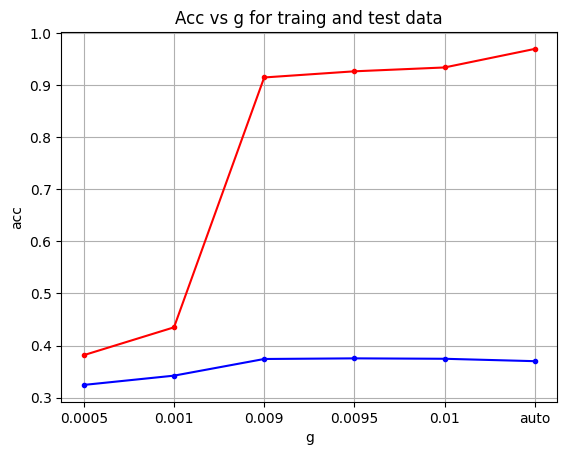

In [34]:
g_range= [0.0005, 0.001, 0.009, 0.0095, 0.01, 'auto']
acc_train_rbf = []
acc_test_rbf = []

s_time_t = time.time()
for g in g_range:
    s_time = time.time()
    svc_G(c = 2.5, g= g)
    f_time = time.time()
    d=f_time - s_time
    print(f'Durration for gamma: {g} is {d}sec')
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

plt.plot(g_range, acc_train_rbf, '.-', color='red')
plt.plot(g_range, acc_test_rbf, '.-', color='blue')
plt.xlabel('g')
plt.ylabel('acc')
plt.title('Acc vs g for traing and test data')
plt.grid()

In [12]:
c_rbf= [1, 2.5, 5, 10, 20]
gamma= [0.0001, 0.001, 'auto']
acc_train_rbf = []
acc_test_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_test = svc_G(c, g= g)
        f_time = time.time()
        d=f_time - s_time
        print(f'Durration for C: {c} and gamma: {g} is {d}sec')

        results.append({'C': c, 'gamma': g, 'acc_train': acc_train, 'acc_test': acc_test, 'duration': d})
        
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

df = pd.DataFrame(results)
df

Train accuracy: 0.321000
Test accuracy: 0.324000
The C is: 1 and the gamma is: 0.0001
Durration for C: 1 and gamma: 0.0001 is 418.5398066043854sec
Train accuracy: 0.409840
Test accuracy: 0.393600
The C is: 1 and the gamma is: 0.001
Durration for C: 1 and gamma: 0.001 is 373.0708634853363sec
Train accuracy: 0.783700
Test accuracy: 0.480000
The C is: 1 and the gamma is: auto
Durration for C: 1 and gamma: auto is 384.50564527511597sec
Train accuracy: 0.335940
Test accuracy: 0.334500
The C is: 2.5 and the gamma is: 0.0001
Durration for C: 2.5 and gamma: 0.0001 is 386.7293872833252sec
Train accuracy: 0.445600
Test accuracy: 0.417300
The C is: 2.5 and the gamma is: 0.001
Durration for C: 2.5 and gamma: 0.001 is 351.62561559677124sec
Train accuracy: 0.920880
Test accuracy: 0.490700
The C is: 2.5 and the gamma is: auto
Durration for C: 2.5 and gamma: auto is 519.0889716148376sec
Train accuracy: 0.348220
Test accuracy: 0.342800
The C is: 5 and the gamma is: 0.0001
Durration for C: 5 and gamma: 

,C,gamma,acc_train,acc_test,duration
0,1.0,0.0001,0.32100,0.3240,418.539807
1,1.0,0.001,0.40984,0.3936,373.070863
2,1.0,auto,0.78370,0.4800,384.505645
3,2.5,0.0001,0.33594,0.3345,386.729387
4,2.5,0.001,0.44560,0.4173,351.625616
5,2.5,auto,0.92088,0.4907,519.088972
6,5.0,0.0001,0.34822,0.3428,370.413485
7,5.0,0.001,0.48034,0.4302,337.768128
8,5.0,auto,0.96622,0.4893,553.811976
9,10.0,0.0001,0.35990,0.3559,362.466607


In [13]:
idmax = df['acc_test'].idxmax()
idmax

5

In [14]:
1/X_train_g.shape[1]

0.012987012987012988

In [35]:
c_rbf= [2.5, 5, 7.5]
gamma= [0.0095, 0.01,'auto']
acc_train_rbf = []
acc_test_rbf = []

results = []

s_time_t = time.time()
for c in c_rbf:
    for g in gamma:
        s_time = time.time()
        acc_train, acc_test = svc_G(c, g= g)
        f_time = time.time()
        d=f_time - s_time
        print(f'Durration for C: {c} and gamma: {g} is {d}sec')

        results.append({'C': c, 'gamma': g, 'acc_train': acc_train, 'acc_test': acc_test, 'duration': d})
        
f_time_t = time.time()
dur = f_time_t - s_time_t
print(f'Durration: {dur:.2f}')

df = pd.DataFrame(results)
df

Train accuracy: 0.926600
Test accuracy: 0.375400
The C is: 2.5 and the gamma is: 0.0095
Durration for C: 2.5 and gamma: 0.0095 is 7.460336208343506sec
Train accuracy: 0.934000
Test accuracy: 0.374600
The C is: 2.5 and the gamma is: 0.01
Durration for C: 2.5 and gamma: 0.01 is 7.598841905593872sec
Train accuracy: 0.969600
Test accuracy: 0.370000
The C is: 2.5 and the gamma is: auto
Durration for C: 2.5 and gamma: auto is 7.646691560745239sec
Train accuracy: 0.976200
Test accuracy: 0.366000
The C is: 5 and the gamma is: 0.0095
Durration for C: 5 and gamma: 0.0095 is 7.598882675170898sec
Train accuracy: 0.981800
Test accuracy: 0.367500
The C is: 5 and the gamma is: 0.01
Durration for C: 5 and gamma: 0.01 is 7.357379913330078sec
Train accuracy: 0.994000
Test accuracy: 0.366900
The C is: 5 and the gamma is: auto
Durration for C: 5 and gamma: auto is 7.34008526802063sec
Train accuracy: 0.990800
Test accuracy: 0.362700
The C is: 7.5 and the gamma is: 0.0095
Durration for C: 7.5 and gamma: 0.0

,C,gamma,acc_train,acc_test,duration
0,2.5,0.0095,0.9266,0.3754,7.460336
1,2.5,0.01,0.9340,0.3746,7.598842
2,2.5,auto,0.9696,0.3700,7.646692
3,5.0,0.0095,0.9762,0.3660,7.598883
4,5.0,0.01,0.9818,0.3675,7.357380
5,5.0,auto,0.9940,0.3669,7.340085
6,7.5,0.0095,0.9908,0.3627,7.309272
7,7.5,0.01,0.9918,0.3632,7.411109
8,7.5,auto,0.9982,0.3658,7.615679


In [36]:
idmax = df['acc_test'].idxmax()
idmax

0

Για όλα τα δεδομένα με C = 2.5 και gamma = 0.0095

In [43]:
from sklearn.svm import SVC

best_model = SVC(kernel='rbf',C=2.5, gamma=0.0095)
s_time = time.time()
best_model.fit(X_train_g, y_train)
f_time = time.time()
print(f'Fitting time is: {f_time - s_time}')
s_t = time.time()
y_pred_train = best_model.predict(X_train_g)
acc_train = np.mean(y_pred_train == y_train)
f_t = time.time()
print('Train accuracy: {0:f}'.format(acc_train))
print(f'Training time: {f_t - s_t}')
s_t = time.time()
y_pred_test = best_model.predict(X_test_g)
acc_test = np.mean(y_pred_test == y_test)
f_t = time.time()
print('Test accuracy: {0:f}'.format(acc_test))
print(f'Testing time: {f_t - s_t}')

Fitting time is: 169.8067181110382
Train accuracy: 0.858700
Training time: 196.58207774162292
Test accuracy: 0.488300
Testing time: 39.2997727394104
